In [2]:
#pip install plotly

     |████████████████████████████████| 13.2 MB 5.7 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=beab3d28df5e24f15587beefb519db17849be1070b6fdaa9c2cf3b31a6039912
  Stored in directory: /Users/bharath/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

In [14]:
#Reading application.csv Data
application_data = pd.read_csv('/Users/bharath/Desktop/DS_ENV/PGDDS/EDA_CASE_STUDY/application_data.csv')
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Understanding the Data

In [15]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [16]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


### Since there are 122 Columns we can take  meaningful columns for our calculation.

In [17]:
list(application_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [18]:
application_data = application_data.filter(['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',                                         
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
"DAYS_LAST_PHONE_CHANGE"])

In [19]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [8]:
application_data.shape

(307511, 41)

In [9]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(application_data.isnull().sum() * 100 / len(application_data)).round(2)



SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
F

In [20]:
#method to calculate percentage of NaN values in DataFrame
def get_perc_of_missing_values(series):
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 3)
get_perc_of_missing_values(application_data)

SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
FLAG_OWN_REALTY                0.000
CNT_CHILDREN                   0.000
AMT_INCOME_TOTAL               0.000
AMT_CREDIT                     0.000
AMT_ANNUITY                    0.000
AMT_GOODS_PRICE                0.001
NAME_TYPE_SUITE                0.004
NAME_INCOME_TYPE               0.000
NAME_EDUCATION_TYPE            0.000
NAME_FAMILY_STATUS             0.000
NAME_HOUSING_TYPE              0.000
REGION_POPULATION_RELATIVE     0.000
DAYS_BIRTH                     0.000
DAYS_EMPLOYED                  0.000
DAYS_REGISTRATION              0.000
DAYS_ID_PUBLISH                0.000
OCCUPATION_TYPE                0.313
CNT_FAM_MEMBERS                0.000
FLAG_MOBIL                     0.000
FLAG_EMP_PHONE                 0.000
FLAG_WORK_PHONE                0.000
FLAG_CONT_MOBILE               0.000
F

In [21]:
# Iterate over columns in DataFrame and delete those with where >30% of the values are null
for col, values in application_data.iteritems():
    if get_perc_of_missing_values(application_data[col]) > 0.30:
        application_data.drop(col, axis=1, inplace=True)
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,NaN,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,0.729567,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,NaN,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1.0,1,1,0,1,0,1,1,THURSDAY,15,0,0,0,0,Services,0.681632,NaN,-273.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1.0,1,0,0,1,0,2,2,MONDAY,8,0,0,0,0,XNA,0.115992,NaN,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1.0,1,1,0,1,1,3,3,THURSDAY,9,0,0,0,1,School,0.535722,0.218859,-1909.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,2.0,1,1,0,1,0,2,2,WEDNESDAY,9,0,0,1,1,Business Entity Type 1,0.514163,0.661024,-322.0


In [22]:
application_data.shape

(307511, 39)

In [23]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(application_data.isnull().sum() * 100 / len(application_data)).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_EMAIL                      0.00
R

In [24]:
# Removing External_Source_3 Column , since it has almost 20% Missing Values
application_data.drop("EXT_SOURCE_3",axis=1,inplace=True)

In [25]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [26]:
for col, values in application_data.iteritems():
    if get_perc_of_missing_values(application_data[col]) < 0.01:
        print(col,get_perc_of_missing_values(application_data[col]))

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.0
AMT_GOODS_PRICE 0.001
NAME_TYPE_SUITE 0.004
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
CNT_FAM_MEMBERS 0.0
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_EMAIL 0.0
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.0
EXT_SOURCE_2 0.002
DAYS_LAST_PHONE_CHANGE 0.0


In [27]:
application_data.shape

(307511, 38)

In [28]:
# Since from the above code we can intepret that "AMT_GOODS_PRICE ,EXT_SOURCE_2,"" has very low missing values and 
# we can fill those columns with Mean Values

# Beacuse for the other columns CNT_SOCIAL_CIRCLE series there is no definite mean , percentile values,SO that we can fill will
#mean values

application_data['AMT_GOODS_PRICE'].fillna((application_data['AMT_GOODS_PRICE'].mean()), inplace=True)

application_data['EXT_SOURCE_2'].fillna((application_data['EXT_SOURCE_2'].mean()), inplace=True)





In [29]:
# Mean values are filled
application_data[["AMT_GOODS_PRICE","EXT_SOURCE_2"]].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4050000.000
EXT_SOURCE_2,307511.0,0.514393,0.190855,8.173617e-08,0.392974,0.565467,0.663422,0.855


In [30]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [32]:
#Here "Unaccompanied" data has the highest mode.We can fill missing values  with Unaccompanied

application_data["NAME_TYPE_SUITE"].fillna(application_data["NAME_TYPE_SUITE"].mode()[0],inplace=True)


### Finding Outliers

In [33]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [34]:
# As AMT_ANNUITY,CNT_FAM_MEMBERS columns has very,very few NaN values, we can fill it with mean value
application_data['AMT_ANNUITY'].fillna((application_data['AMT_ANNUITY'].mean()), inplace=True)
application_data['CNT_FAM_MEMBERS'].fillna((application_data['CNT_FAM_MEMBERS'].mean()), inplace=True)
application_data['DAYS_LAST_PHONE_CHANGE'].fillna((application_data['DAYS_LAST_PHONE_CHANGE'].mean()), inplace=True)

In [35]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.573909,14493.454517,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
outlier_df = application_data.select_dtypes(include=numerics)

In [37]:
outlier_df.shape

(307511, 27)

In [38]:
outlier_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.573909,14493.454517,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538396.207429,369279.426396,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


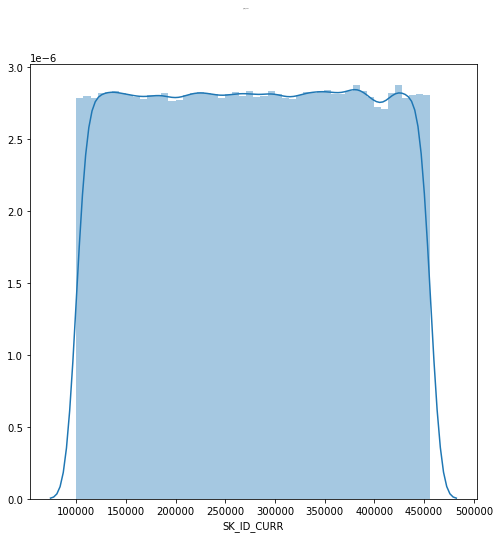

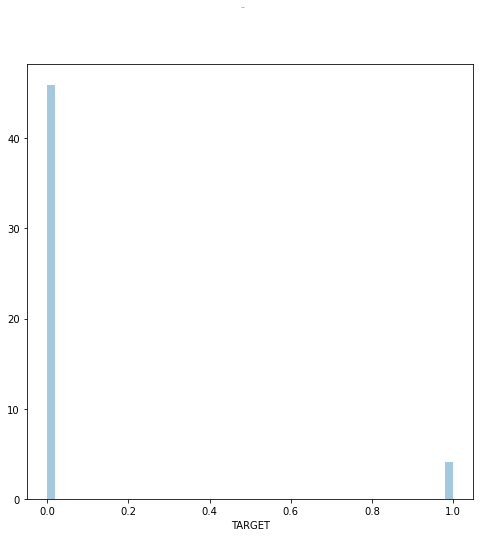

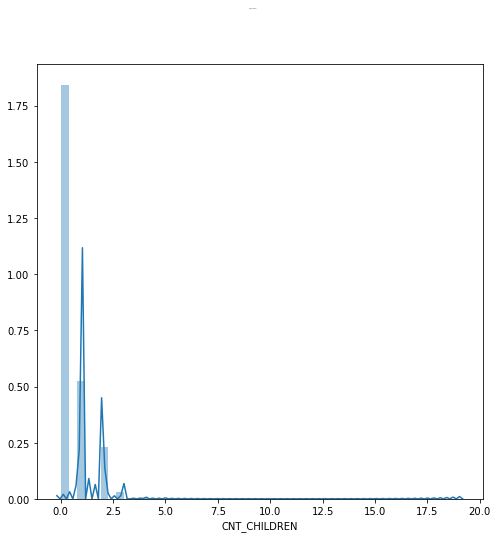

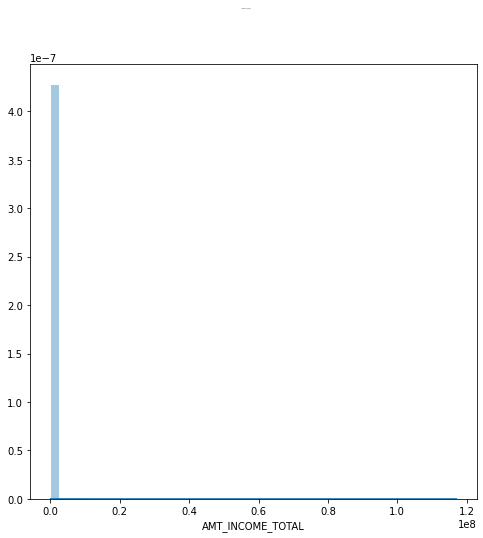

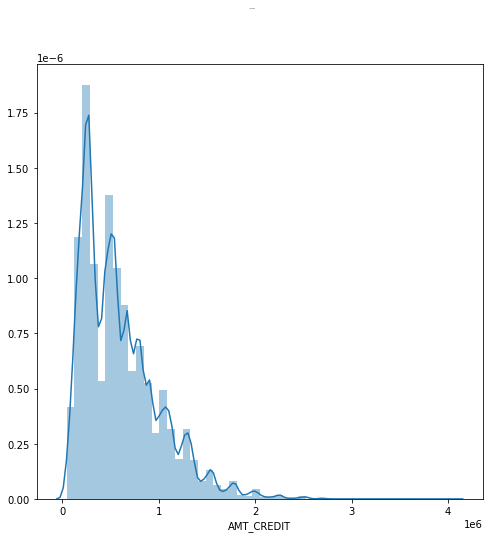

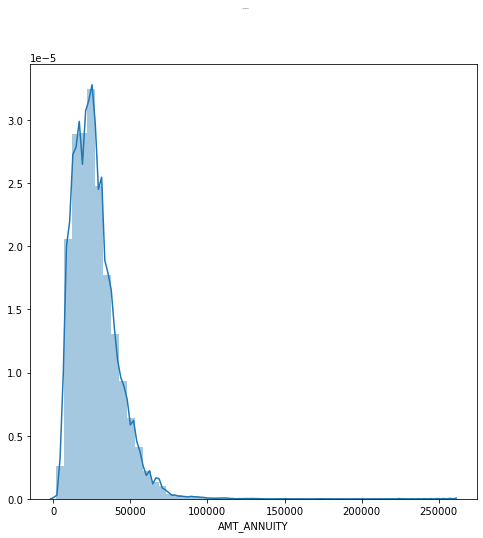

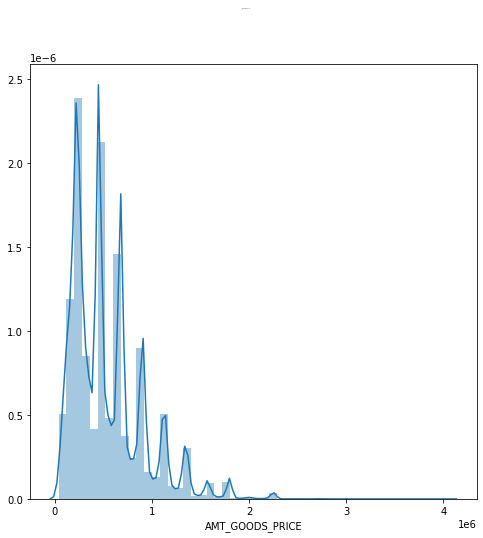

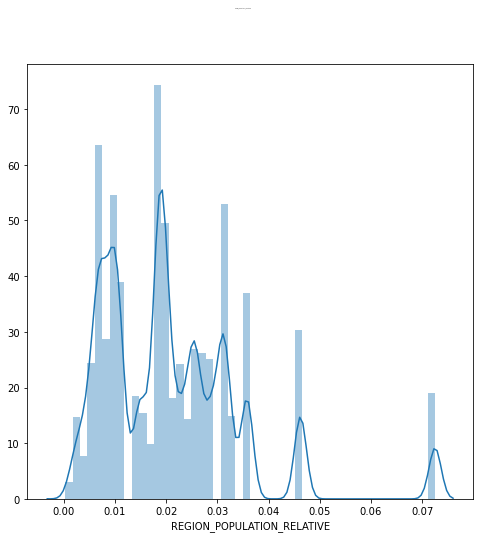

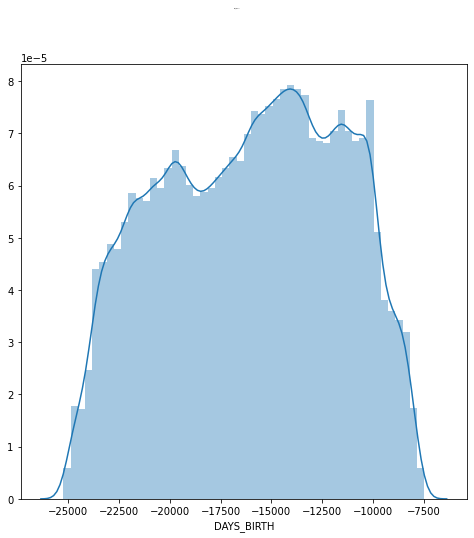

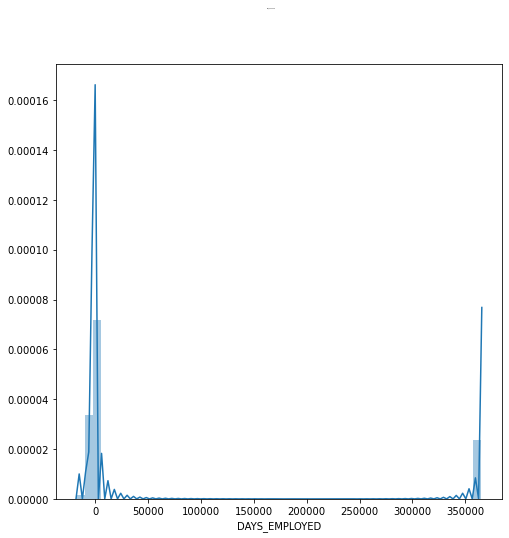

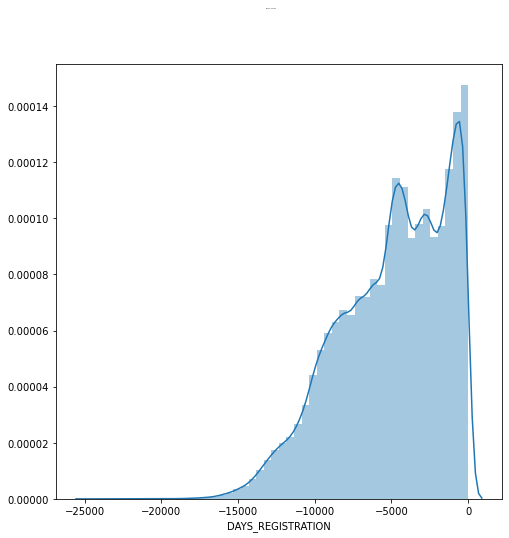

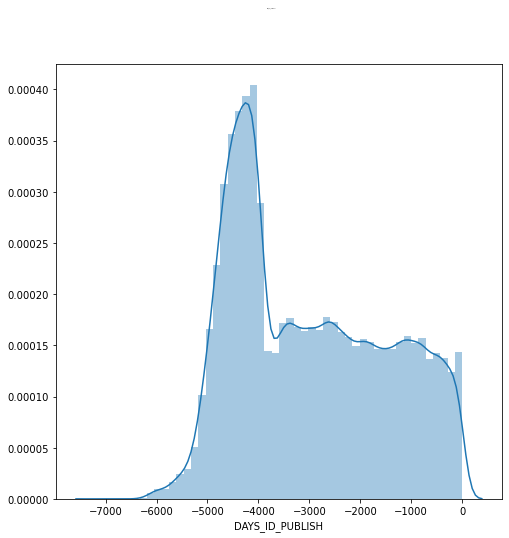

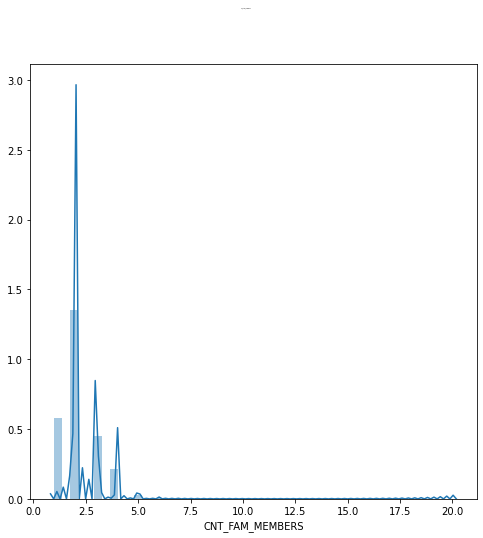

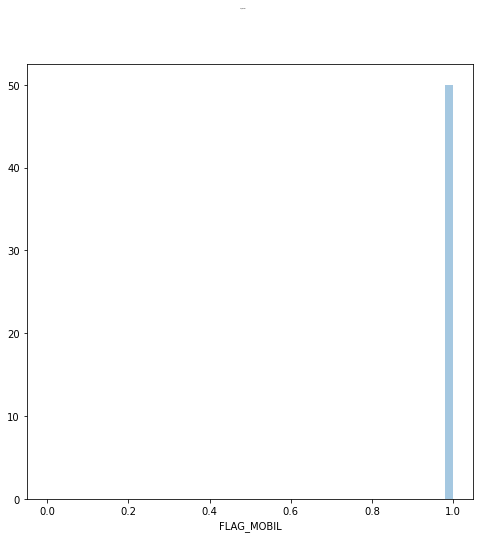

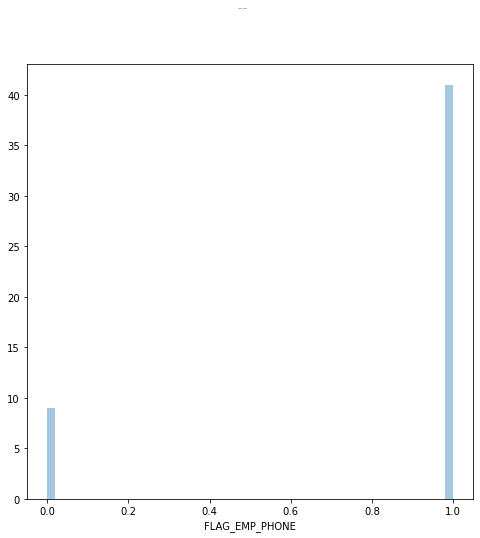

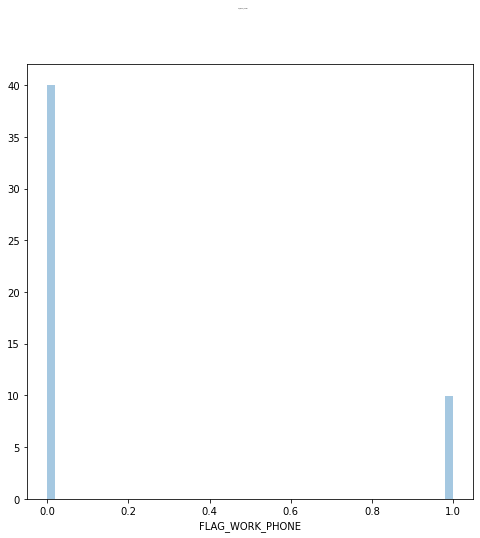

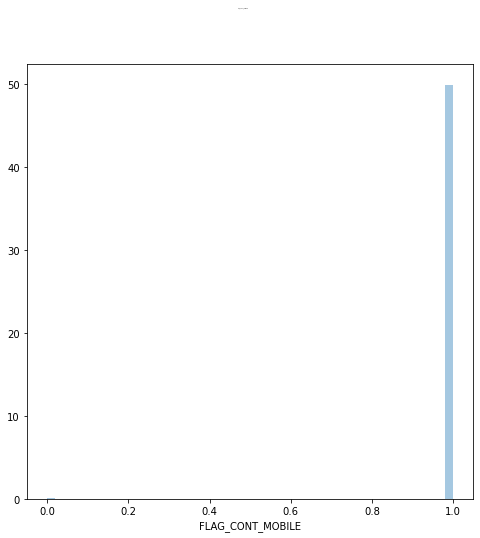

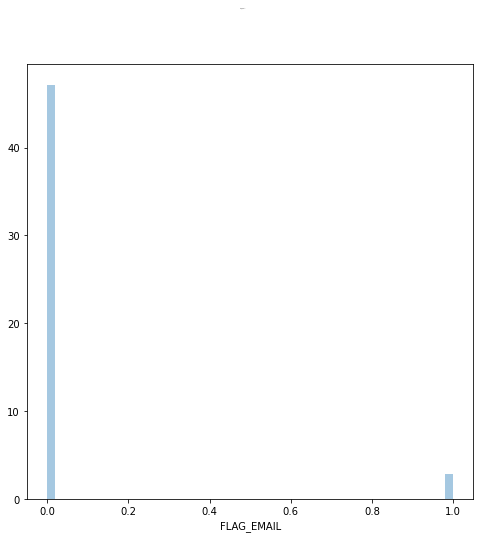

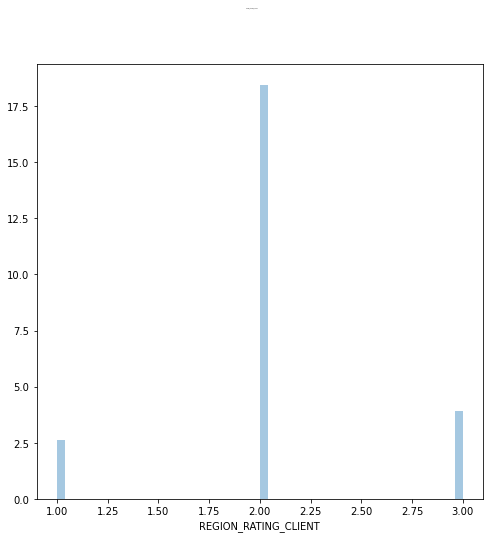

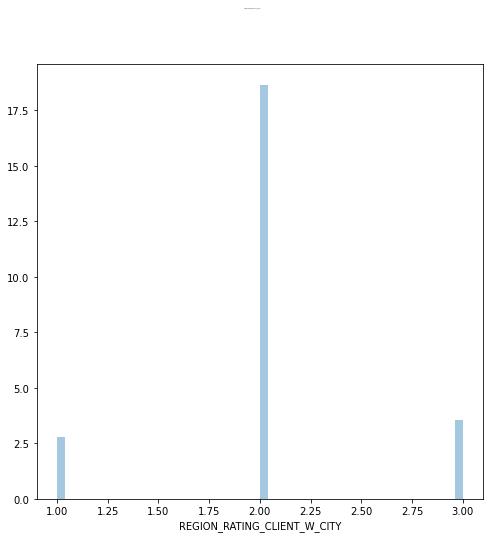

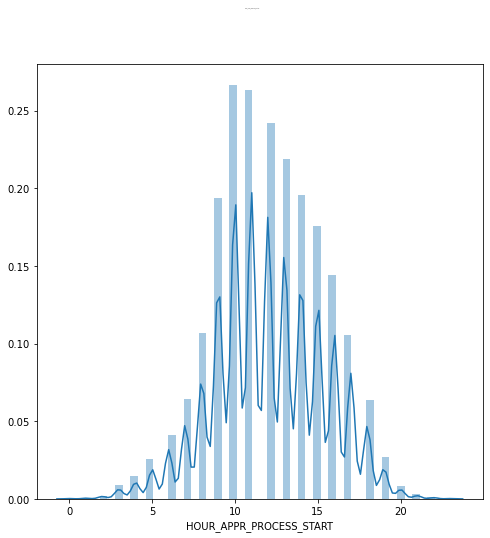

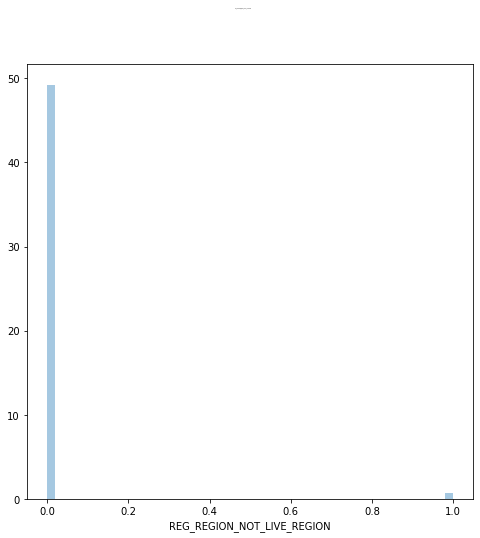

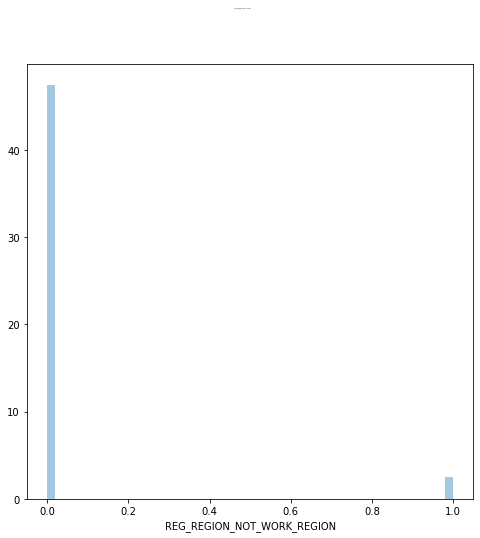

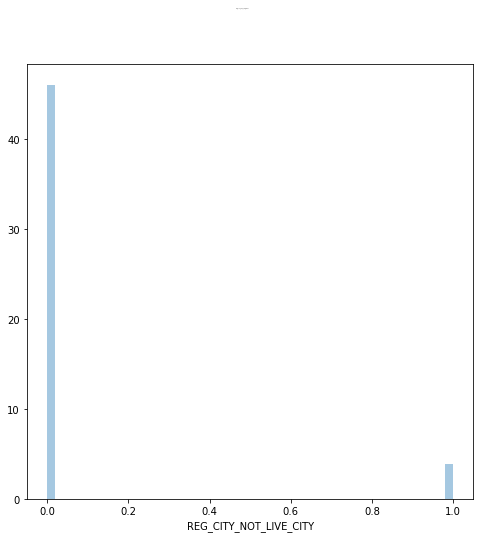

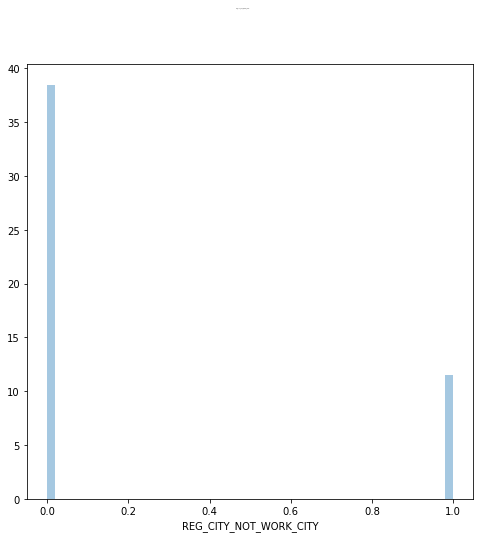

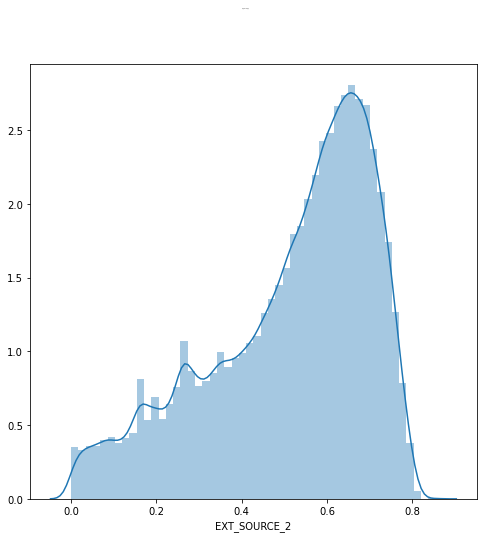

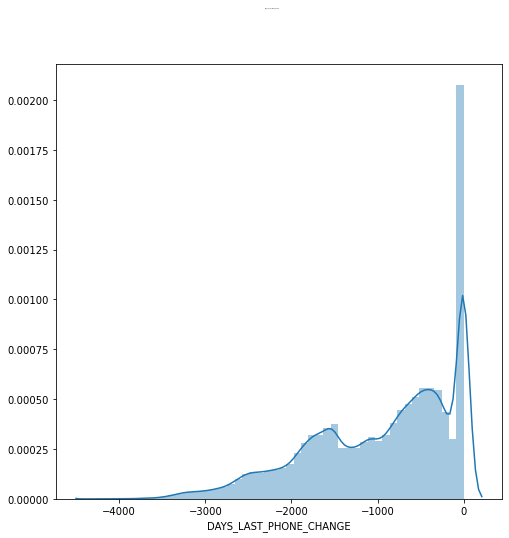

In [44]:
for cols,values in outlier_df.iteritems():
    f, ax = plt.subplots(1,1,figsize=(8,8))
    f.suptitle(cols, fontsize=1)
    outlier_plot = sns.distplot(outlier_df[cols])

> Above box plot for **CNT_CHILDREN** shows a large outlier(19). SInce a family cannot or very rare to have 19 children.

>In the **DAYS_EMPLOYED** there is a value present at 36k range, this wont be possible.This could have occured during data entry 

>In the plot **AMT_INCOME_TOTAL**, we can vicually see that the MAX amount is way largert than the other statistical datas[Mean,(25,50,75)percentiles]

In [45]:
application_data[["CNT_CHILDREN","DAYS_EMPLOYED","AMT_INCOME_TOTAL"]].describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0


In [48]:
q1=application_data["CNT_CHILDREN"].quantile(0.99)
q1

3.0

In [50]:
application_data.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

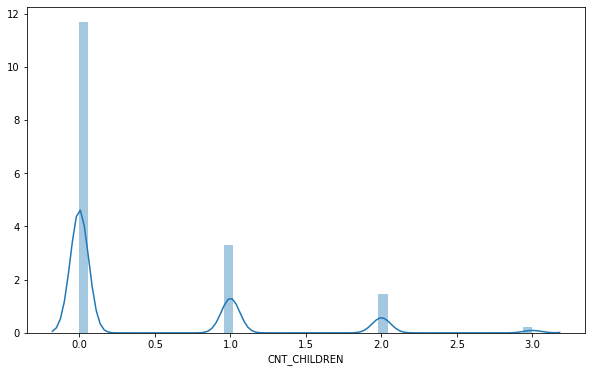

In [51]:
q1=application_data["CNT_CHILDREN"].quantile(0.99)
application_data["CNT_CHILDREN"] =  application_data.CNT_CHILDREN.apply(lambda x: q1 if x>q1 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_1 = sns.distplot(application_data["CNT_CHILDREN"])

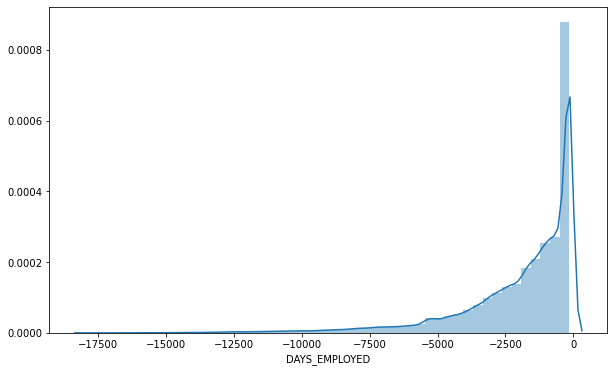

In [52]:
q2=application_data["DAYS_EMPLOYED"].quantile(0.80)
application_data["DAYS_EMPLOYED"] =  application_data.DAYS_EMPLOYED.apply(lambda x: q2 if x>q2 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_2 = sns.distplot(application_data["DAYS_EMPLOYED"])

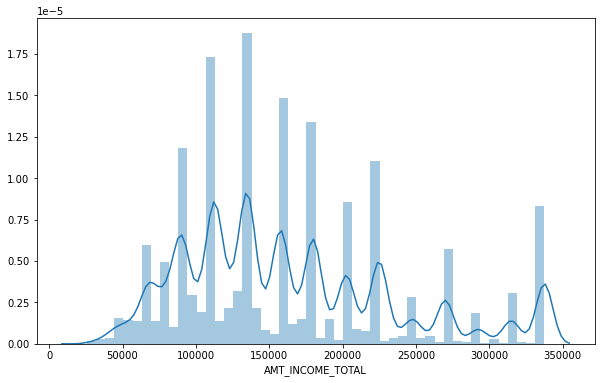

In [53]:
q3=application_data["AMT_INCOME_TOTAL"].quantile(0.95)
application_data["AMT_INCOME_TOTAL"] =  application_data.AMT_INCOME_TOTAL.apply(lambda x: q3 if x>q3 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_3 = sns.distplot(application_data["AMT_INCOME_TOTAL"])

In [54]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1.0,1,1,0,1,0,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.262949,-1134.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,2.0,1,1,0,1,0,1,1,MONDAY,11,0,0,0,0,School,0.622246,-828.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1.0,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,Government,0.555912,-815.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,2.0,1,1,0,1,0,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.650442,-617.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1.0,1,1,0,1,0,2,2,THURSDAY,11,0,0,0,1,Religion,0.322738,-1106.0


In [55]:
# Converting DAYS_BIRTH to AGE
application_data["AGE"] = application_data.DAYS_BIRTH.apply(lambda x :round(abs(x)/365),0)
application_data["AGE"]
application_data["AGE"] = pd.to_numeric(application_data["AGE"])

In [57]:
# Dropping "DAYS_BIRTH" column, since we have converted the DAYS to AGE
application_data.drop("DAYS_BIRTH",axis=1,inplace=True)

KeyError: "['DAYS_BIRTH'] not found in axis"

In [58]:
application_data.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.85,1])

0.25    112500.0
0.50    147150.0
0.85    234000.0
1.00    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
application_data.CNT_FAM_MEMBERS.unique()

array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
        6.        ,  9.        ,  7.        ,  8.        , 10.        ,
       13.        ,  2.15266545, 14.        , 12.        , 20.        ,
       15.        , 16.        , 11.        ])

In [60]:
#Since 2.15 member can be present, we are rounding off the values.
application_data.CNT_FAM_MEMBERS = application_data.CNT_FAM_MEMBERS.apply(lambda x : round(x,0))

### Binning Salary Amount to Categories for more Clarity

In [61]:
# Based on the Quantile Values , segregating the values to its respective categories
def salary_category_func(x):
    if x<337500 and x>=234000:
        return('HIGH')
    elif x<234000 and x>=147150:
        return('MODERATE')
    elif x<147150 and x>=112500:
        return('LOW')
    else:
        return("EXTREMLY LOW")
application_data["SALARY_CATEGORY"] = application_data.AMT_INCOME_TOTAL.apply(salary_category_func)    
application_data["SALARY_CATEGORY"]    
        

0             MODERATE
1                 HIGH
2         EXTREMLY LOW
3                  LOW
4                  LOW
              ...     
307506        MODERATE
307507    EXTREMLY LOW
307508        MODERATE
307509        MODERATE
307510        MODERATE
Name: SALARY_CATEGORY, Length: 307511, dtype: object

In [62]:
application_data.SALARY_CATEGORY.value_counts()

MODERATE        106966
EXTREMLY LOW     85384
LOW              84194
HIGH             30967
Name: SALARY_CATEGORY, dtype: int64

In [63]:
#Dropping "AMT_INCOME_TOTAL" Column,because have Binned those Salary Values
application_data.drop("AMT_INCOME_TOTAL",axis=1,inplace=True)

### Analysing the count of Target variables

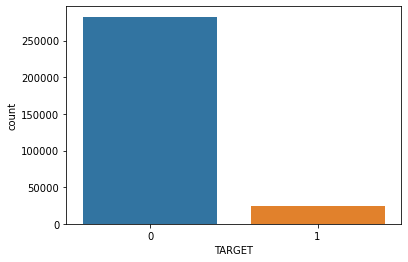

In [64]:
Target_count= sns.countplot("TARGET",data =application_data)

>We can see there is a huge imbalance in out Target variable. So we can segregate the Target variable into two different dataframes

# Dividing the Application into Two Dataframes based on the Target Variable

In [65]:
good_client = application_data[application_data.TARGET == 0]
defaulter_client = application_data[application_data.TARGET == 1]

In [66]:
good_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   282686 non-null  int64  
 1   TARGET                       282686 non-null  int64  
 2   NAME_CONTRACT_TYPE           282686 non-null  object 
 3   CODE_GENDER                  282686 non-null  object 
 4   FLAG_OWN_CAR                 282686 non-null  object 
 5   FLAG_OWN_REALTY              282686 non-null  object 
 6   CNT_CHILDREN                 282686 non-null  float64
 7   AMT_CREDIT                   282686 non-null  float64
 8   AMT_ANNUITY                  282686 non-null  float64
 9   AMT_GOODS_PRICE              282686 non-null  float64
 10  NAME_TYPE_SUITE              282686 non-null  object 
 11  NAME_INCOME_TYPE             282686 non-null  object 
 12  NAME_EDUCATION_TYPE          282686 non-null  object 
 13 

In [67]:
defaulter_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   24825 non-null  int64  
 1   TARGET                       24825 non-null  int64  
 2   NAME_CONTRACT_TYPE           24825 non-null  object 
 3   CODE_GENDER                  24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   CNT_CHILDREN                 24825 non-null  float64
 7   AMT_CREDIT                   24825 non-null  float64
 8   AMT_ANNUITY                  24825 non-null  float64
 9   AMT_GOODS_PRICE              24825 non-null  float64
 10  NAME_TYPE_SUITE              24825 non-null  object 
 11  NAME_INCOME_TYPE             24825 non-null  object 
 12  NAME_EDUCATION_TYPE          24825 non-null  object 
 13  NAME_FAMILY_STA

## Check for clients who are unlikely to pay the loans

In [68]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Univariate_defaulter_Num_1_df = defaulter_client.select_dtypes(include=numerics)
Univariate_defaulter_Num_1_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AGE
0,100002,1,0.0,406597.5,24700.5,351000.0,0.018801,-637.0,-3648.0,-2120,1.0,1,1,0,1,0,2,2,10,0,0,0,0,0.262949,-1134.0,26
26,100031,1,0.0,979992.0,27076.5,702000.0,0.018029,-2628.0,-6573.0,-1827,1.0,1,1,0,1,0,3,2,9,0,0,0,0,0.548477,-161.0,51
40,100047,1,0.0,1193580.0,35028.0,855000.0,0.025164,-1262.0,-1182.0,-1029,2.0,1,1,0,1,0,2,2,9,0,0,0,0,0.306841,-1075.0,48
42,100049,1,0.0,288873.0,16258.5,238500.0,0.007305,-3597.0,-45.0,-4409,2.0,1,1,1,1,0,3,3,11,0,0,0,0,0.674203,-1480.0,37
81,100096,1,0.0,252000.0,14593.5,252000.0,0.028663,-144.0,-5391.0,-4199,2.0,1,0,0,1,0,2,2,10,0,0,0,0,0.023952,0.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,1.0,450000.0,32746.5,450000.0,0.020246,-3048.0,-8507.0,-2580,3.0,1,1,1,1,0,3,3,16,0,0,0,0,0.329708,-324.0,27
307475,456215,1,1.0,1303200.0,46809.0,1125000.0,0.007330,-2405.0,-500.0,-4704,3.0,1,1,1,1,0,2,2,13,0,0,0,0,0.583214,-1492.0,37
307481,456225,1,0.0,297000.0,19975.5,297000.0,0.008575,-3147.0,-8921.0,-3832,2.0,1,1,0,1,0,2,2,15,0,0,0,0,0.713524,-2941.0,57
307489,456233,1,0.0,521280.0,23089.5,450000.0,0.014464,-286.0,-8291.0,-9,2.0,1,1,0,1,0,2,2,5,0,0,0,0,0.615261,-307.0,45


In [69]:
categorical = ["object"]
Univariate_defaulter_Cat_1_df =defaulter_client.select_dtypes(include=categorical)
Univariate_defaulter_Cat_1_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,SALARY_CATEGORY
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3,MODERATE
26,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,MONDAY,Business Entity Type 3,LOW
40,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3,MODERATE
42,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,THURSDAY,Self-employed,LOW
81,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,THURSDAY,XNA,EXTREMLY LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
307448,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,MONDAY,Business Entity Type 3,MODERATE
307475,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,THURSDAY,Construction,LOW
307481,Cash loans,M,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Business Entity Type 3,MODERATE
307489,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,FRIDAY,Business Entity Type 3,MODERATE


**_FLAG_OWN_REALTY_**

Let's compare and check how the possesion of a property affects the repayment of loans. 

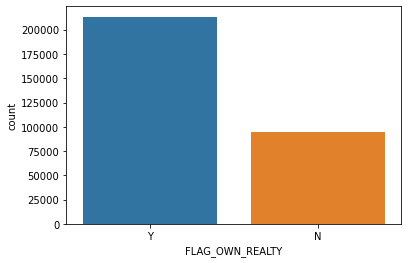

In [70]:
#graph to plot Number of property owners and non-property owners in the entire polulation
PropertyOwners_vs_Total = sns.countplot("FLAG_OWN_REALTY",data =application_data)

From above plot we can see that clients having some sort of real estate acquirements are more that the ones who don't have any property.

In [71]:
#find the percentage of property and non-property owners in the defaulter list
test_df1=round((Univariate_defaulter_Cat_1_df["FLAG_OWN_REALTY"].value_counts()/application_data["FLAG_OWN_REALTY"].value_counts())*100,2)
test_df1 = pd.DataFrame(test_df1)
test_df1.reset_index(level=0, inplace=True)
test_df1.rename(columns=  {"index": "FLAG_OWN_REALTY", 
                     "FLAG_OWN_REALTY":"Default_Percentage"}, 
                                 inplace = True) 
test_df1

,FLAG_OWN_REALTY,Default_Percentage
0,Y,7.96
1,N,8.32


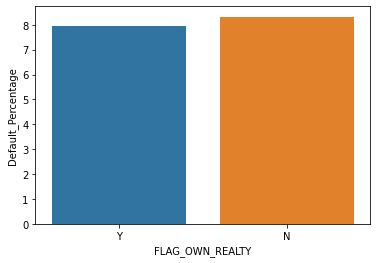

In [72]:
#plot to show the number of property and non-property owners vs. Target variable. Here, Target =1
PropertyOwners_vs_Target= sns.barplot(x="FLAG_OWN_REALTY",y="Default_Percentage",data=test_df1)

From above graph, we can see that the number of non-payers of loan i.e., defaulters are very close almost equal to 9%. It is difficult to decide a target based on this metric.

**_CODE_GENDER_**

Let's compare and check how the gender of client affects the repayment of loans.

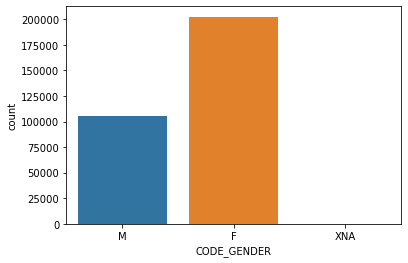

In [73]:
#graph to plot Males and femals in the entire polulation
Gender_vs_Total = sns.countplot("CODE_GENDER",data =application_data)

In [74]:
#find the percentage of males and females in the defaulter list
test_df2=round((Univariate_defaulter_Cat_1_df["CODE_GENDER"].value_counts()/application_data["CODE_GENDER"].value_counts())*100,2)
test_df2 = pd.DataFrame(test_df2)
test_df2.reset_index(level=0, inplace=True)
test_df2.rename(columns=  {"index": "CODE_GENDER", 
                     "CODE_GENDER":"Default_Percentage"}, 
                                 inplace = True) 
test_df2

,CODE_GENDER,Default_Percentage
0,F,7.00
1,M,10.14
2,XNA,NaN


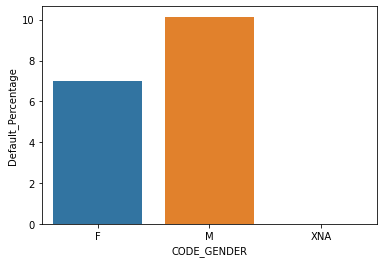

In [75]:
#plot to show the number male and female clients vs. Target variable. Here, Target =1
Gender_vs_Target= sns.barplot(x="CODE_GENDER",y="Default_Percentage",data=test_df2)

So, from above plots and data we can cleary see that the Female clients are a better TARGET as compared to the Male clients. Observing the percent of defaulted credits, male client have a higher chance of not returning their loans [10.14%], compared to the female clients [7%].

**_FLAG_OWN_CAR _**

Let's compare and check how the car owners and non-car owners differ in their repayment of loans.

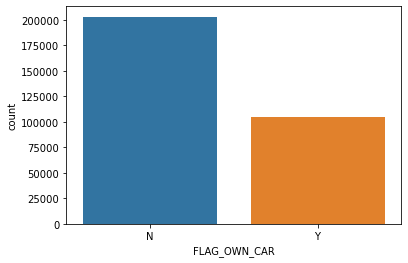

In [76]:
#graph to plot car owners and non-carOwners in the entire polulation
CarOwner_vs_Total = sns.countplot("FLAG_OWN_CAR",data =application_data)

Clients who don't own cars/vehicles are more in the given polultaion.

In [77]:
#find the percentage of car owners and non-carOwners in the defaulter list
test_df3=round((Univariate_defaulter_Cat_1_df["FLAG_OWN_CAR"].value_counts()/application_data["FLAG_OWN_CAR"].value_counts())*100,2)
test_df3 = pd.DataFrame(test_df3)
test_df3.reset_index(level=0, inplace=True)
test_df3.rename(columns=  {"index": "FLAG_OWN_CAR", 
                     "FLAG_OWN_CAR":"Default_Percentage"}, 
                                 inplace = True) 
test_df3

,FLAG_OWN_CAR,Default_Percentage
0,N,8.50
1,Y,7.24


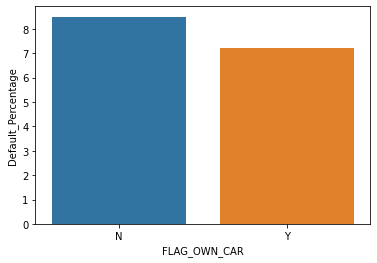

In [79]:
#plot to show the car owners and non-carOwners vs. Target variable. Here, Target =1
CarOwner_vs_Target= sns.barplot(x="FLAG_OWN_CAR",y="Default_Percentage",data=test_df3)

As we can see from above graph,the clients that own a car are less likely to not repay the loan when compared to the ones that do not own a car. The loan non-repayment rates of both the Car Owners and Non-Car Owners are very close. Which is interesting to see and indicates that probably this metric will not be a suitable one when targeting a client.

**_NAME_FAMILY_STATUS_**

Let's compare and check how the family status of clients affect their repayment of loans.

In [80]:
x = application_data.NAME_FAMILY_STATUS.value_counts()
x = pd.DataFrame(x)
x.reset_index(level=0, inplace=True)
x.rename(columns=  {"index": "NAME_FAMILY_STATUS", 
                     "NAME_FAMILY_STATUS":"number"}, 
                                 inplace = True) 
x

,NAME_FAMILY_STATUS,number
0,Married,196432
1,Single / not married,45444
2,Civil marriage,29775
3,Separated,19770
4,Widow,16088
5,Unknown,2


[Text(0, 0, 'Married'),
 Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Unknown')]

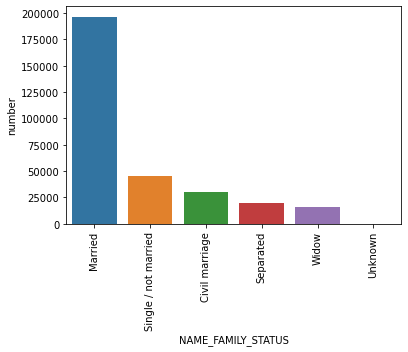

In [81]:
#graph to plot family status of clients in the entire polulation
FamilyStatus_vs_Total = sns.barplot(x="NAME_FAMILY_STATUS",y="number",data =x)
FamilyStatus_vs_Total.set_xticklabels(FamilyStatus_vs_Total.get_xticklabels(),rotation=90)

Most of clients are married, followed by Single and civil marriage.

In [82]:
#find the percentage of clients according to family status in the defaulter list
test_df4=round((Univariate_defaulter_Cat_1_df["NAME_FAMILY_STATUS"].value_counts()/application_data["NAME_FAMILY_STATUS"].value_counts())*100,2)
test_df4 = pd.DataFrame(test_df4)
test_df4.reset_index(level=0, inplace=True)
test_df4.rename(columns=  {"index": "NAME_FAMILY_STATUS", 
                     "NAME_FAMILY_STATUS":"Default_Percentage"}, 
                                 inplace = True) 
test_df4.sort_values(by='Default_Percentage', inplace=True)
test_df4

,NAME_FAMILY_STATUS,Default_Percentage
5,Widow,5.82
1,Married,7.56
2,Separated,8.19
3,Single / not married,9.81
0,Civil marriage,9.94
4,Unknown,NaN


[Text(0, 0, 'Widow'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Unknown')]

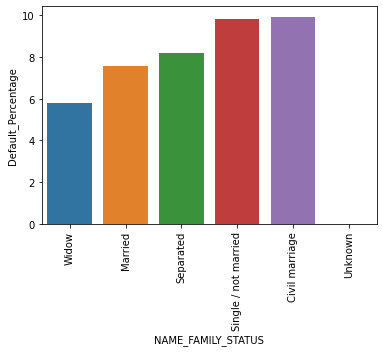

In [83]:
#plot to show the family status of client vs. Target variable. Here, Target =1
FamilyStatus_vs_Target= sns.barplot(x="NAME_FAMILY_STATUS",y="Default_Percentage",data=test_df4)
FamilyStatus_vs_Target.set_xticklabels(FamilyStatus_vs_Target.get_xticklabels(),rotation=90)

From above graph we can say that the percentage of non-repayment of loan is at highest for civil mariage and is lowest for widows.
Which is interesting to see because you expect widows to not payback their loans but it is the opposite here.

**_CNT_CHILDREN_**

Now, let's compare how the number of children in a family affects the non-repayment of loans.

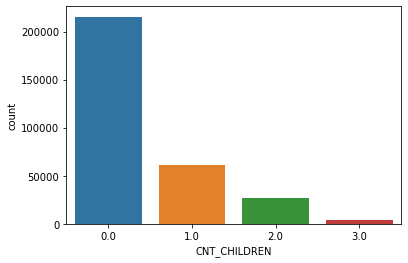

In [84]:
#graph to plot Number of children per client in the entire polulation
NoOfChildren_vs_Total = sns.countplot("CNT_CHILDREN",data =application_data)

In [85]:
#find the percentage  number of children per client the defaulter list
test_df5=round((Univariate_defaulter_Num_1_df["CNT_CHILDREN"].value_counts()/application_data["CNT_CHILDREN"].value_counts())*100,2)
test_df5 = pd.DataFrame(test_df5)
test_df5.reset_index(level=0, inplace=True)

test_df5.rename(columns=  {"index": "CNT_CHILDREN", 
                     "CNT_CHILDREN":"Default_Percentage"}, 
                                 inplace = True)
test_df5.sort_values(by=["Default_Percentage"],ascending=False,inplace=True)
test_df5

,CNT_CHILDREN,Default_Percentage
3,3.0,10.04
1,1.0,8.92
2,2.0,8.72
0,0.0,7.71


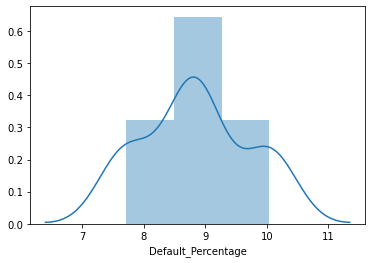

In [86]:
#plot to show the number of children per client vs. Target variable. Here, Target =1
#NoOfChildren_vs_Target= sns.barplot(x="CNT_CHILDREN",y="Default_Percentage",data=test_df5,order=test_df5['CNT_CHILDREN'])
NoOfChildren_vs_Target = sns.distplot(test_df5["Default_Percentage"])

Ther is more chance for a client with more children to not repay the loan back. This can be beacuse of the more liability that is on the client. The more the number of children the more difficult it is for the client to repay the loan due to more personal expenditures.

**_CNT_FAM_MEMBERS_**

In [87]:
y = application_data.CNT_FAM_MEMBERS.value_counts()
y = pd.DataFrame(y)
y.reset_index(level=0, inplace=True)
y.rename(columns=  {"index": "CNT_FAM_MEMBERS", 
                     "CNT_FAM_MEMBERS":"number"}, 
                                 inplace = True) 
y

,CNT_FAM_MEMBERS,number
0,2.0,158359
1,1.0,67847
2,3.0,52601
3,4.0,24697
4,5.0,3478
5,6.0,408
6,7.0,81
7,8.0,20
8,9.0,6
9,10.0,3


[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '20.0')]

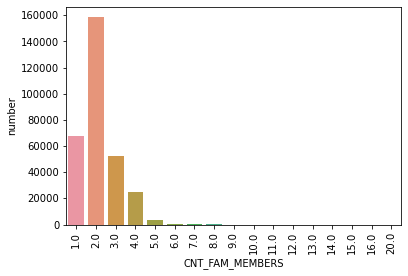

In [88]:
#graph to plot Number of family members per client in the entire polulation

NoOfFamilyMembers_vs_Total = sns.barplot(x="CNT_FAM_MEMBERS",y="number",data =y)
NoOfFamilyMembers_vs_Total.set_xticklabels(NoOfFamilyMembers_vs_Total.get_xticklabels(),rotation=90)

In [89]:
#find the percentage  number of family members per client the defaulter list
test_df6=round((Univariate_defaulter_Num_1_df["CNT_FAM_MEMBERS"].value_counts()/application_data["CNT_FAM_MEMBERS"].value_counts())*100,2)
test_df6 = pd.DataFrame(test_df6)
test_df6.reset_index(level=0, inplace=True)
test_df6.rename(columns=  {"index": "CNT_FAM_MEMBERS", 
                     "CNT_FAM_MEMBERS":"Default_Percentage"}, 
                                 inplace = True) 
test_df6.sort_values(by=["Default_Percentage"],ascending=False,inplace=True)
test_df6

,CNT_FAM_MEMBERS,Default_Percentage
10,11.0,100.00
12,13.0,100.00
9,10.0,33.33
7,8.0,30.00
5,6.0,13.48
4,5.0,9.40
2,3.0,8.76
3,4.0,8.65
0,1.0,8.36
1,2.0,7.58


[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '20.0')]

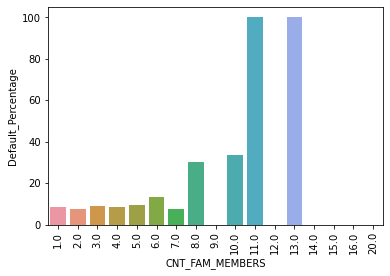

In [90]:
#plot to show the number of family members per client vs. Target variable. Here, Target =1
NoOfFamilyMembers_vs_Target= sns.barplot(x="CNT_FAM_MEMBERS",y="Default_Percentage",data=test_df6)
NoOfFamilyMembers_vs_Target.set_xticklabels(NoOfFamilyMembers_vs_Target.get_xticklabels(),rotation=90)
#NoOfFamilyMembers_vs_Target = sns.distplot(y["number"])

> Though we can see that family with 11,13 members shows highest default rate, but their count is very less[2]. 

_NAME_EDUCATION_TYPE_

[Text(0, 0, 'Secondary / secondary special'),
 Text(0, 0, 'Higher education'),
 Text(0, 0, 'Incomplete higher'),
 Text(0, 0, 'Lower secondary'),
 Text(0, 0, 'Academic degree')]

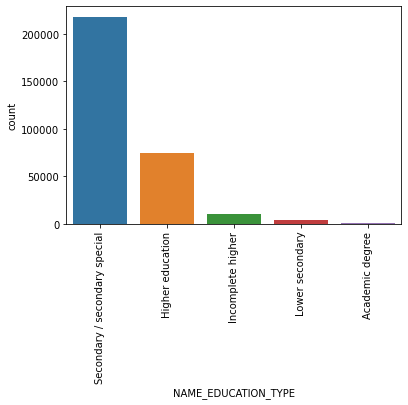

In [91]:
#graph to plot education type in the entire polulation
EducationType_vs_Total = sns.countplot("NAME_EDUCATION_TYPE",data =application_data)
EducationType_vs_Total.set_xticklabels(EducationType_vs_Total.get_xticklabels(),rotation=90)

In [92]:
#find the percentage education level of clients in the defaulter list
test_df7=round((Univariate_defaulter_Cat_1_df["NAME_EDUCATION_TYPE"].value_counts()/application_data["NAME_EDUCATION_TYPE"].value_counts())*100,2)

test_df7 = pd.DataFrame(test_df7)

test_df7.reset_index(level=0, inplace=True)
test_df7.sort_values(by=["NAME_EDUCATION_TYPE"],ascending=False,inplace=True)

test_df7.rename(columns=  {"index": "NAME_EDUCATION_TYPE", 
                     "NAME_EDUCATION_TYPE":"Default_Percentage"}, 
                                  inplace = True) 


test_df7

,NAME_EDUCATION_TYPE,Default_Percentage
3,Lower secondary,10.93
0,Secondary / secondary special,8.94
2,Incomplete higher,8.48
1,Higher education,5.36
4,Academic degree,1.83


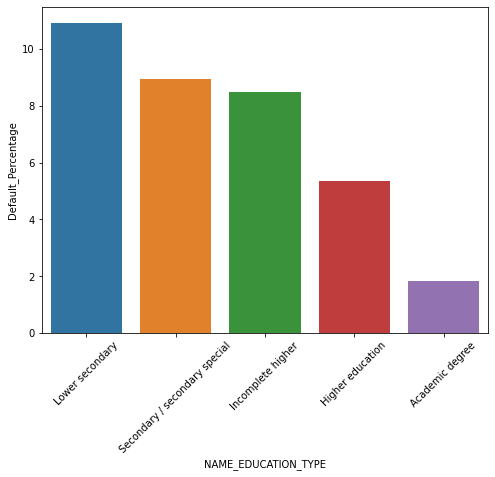

In [93]:
#plot to show the education type of each client vs. Target variable. Here, Target =1
f, ax = plt.subplots(figsize=(8,6))
EducationType_vs_Target= sns.barplot(x="NAME_EDUCATION_TYPE",y="Default_Percentage",data=test_df7,order=test_df7['NAME_EDUCATION_TYPE'])
EducationType_vs_Target.set_xticklabels(EducationType_vs_Target.get_xticklabels(), rotation=45)
EducationType_vs_Target

It can be seen from above graph that the more educated clients are likely to repay their loans because they will be having more stable jobs with monthly income.

_NAME_TYPE_SUITE

[Text(0, 0, 'Unaccompanied'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Spouse, partner'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'Other_A'),
 Text(0, 0, 'Other_B'),
 Text(0, 0, 'Group of people')]

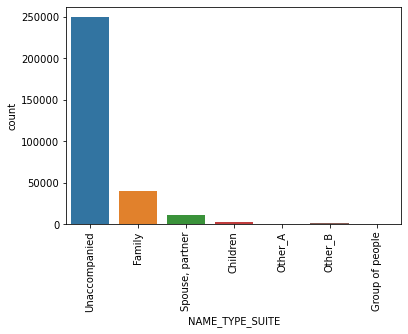

In [95]:
TypeSuite_vs_Total = sns.countplot("NAME_TYPE_SUITE",data =application_data)
TypeSuite_vs_Total.set_xticklabels(TypeSuite_vs_Total.get_xticklabels(),rotation=90)

In [96]:
test_df8=round((Univariate_defaulter_Cat_1_df["NAME_TYPE_SUITE"].value_counts()/application_data["NAME_TYPE_SUITE"].value_counts())*100,2)

test_df8 = pd.DataFrame(test_df8)

test_df8.reset_index(level=0, inplace=True)
test_df8.sort_values(by=["NAME_TYPE_SUITE"],ascending=False,inplace=True)

test_df8.rename(columns=  {"index": "NAME_TYPE_SUITE", 
                     "NAME_TYPE_SUITE":"Default_Percentage"}, 
                                  inplace = True) 


test_df8

,NAME_TYPE_SUITE,Default_Percentage
4,Other_B,9.83
5,Other_A,8.78
6,Group of people,8.49
0,Unaccompanied,8.17
2,"Spouse, partner",7.87
1,Family,7.49
3,Children,7.38


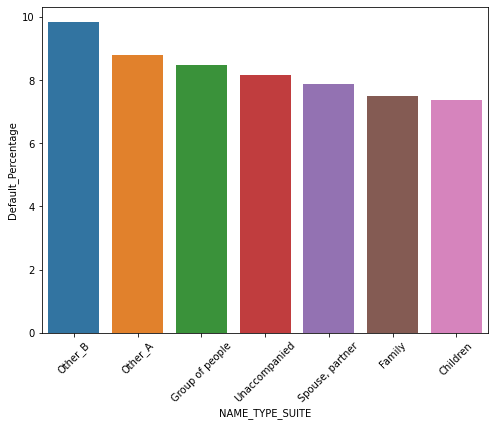

In [97]:
f, ax = plt.subplots(figsize=(8,6))
TypeSuite_vs_Target= sns.barplot(x="NAME_TYPE_SUITE",y="Default_Percentage",data=test_df8
                                         ,order=test_df8['NAME_TYPE_SUITE'])
TypeSuite_vs_Target.set_xticklabels(TypeSuite_vs_Target.get_xticklabels(), rotation=45)
TypeSuite_vs_Target

_ORGANISATION_TYPE_

In [98]:
test_df9=round((Univariate_defaulter_Cat_1_df["ORGANIZATION_TYPE"].value_counts()/application_data["ORGANIZATION_TYPE"].value_counts())*100,2)

test_df9 = pd.DataFrame(test_df9)

test_df9.reset_index(level=0, inplace=True)
test_df9.sort_values(by=["ORGANIZATION_TYPE"],ascending=False,inplace=True)

test_df9.rename(columns=  {"index": "ORGANIZATION_TYPE", 
                     "ORGANIZATION_TYPE":"Default_Percentage"}, 
                                  inplace = True) 


test_df9

,ORGANIZATION_TYPE,Default_Percentage
54,Transport: type 3,15.75
18,Industry: type 13,13.43
25,Industry: type 8,12.50
38,Restaurant,11.71
7,Construction,11.68
6,Cleaning,11.15
14,Industry: type 1,11.07
20,Industry: type 3,10.62
36,Realtor,10.61
1,Agriculture,10.47


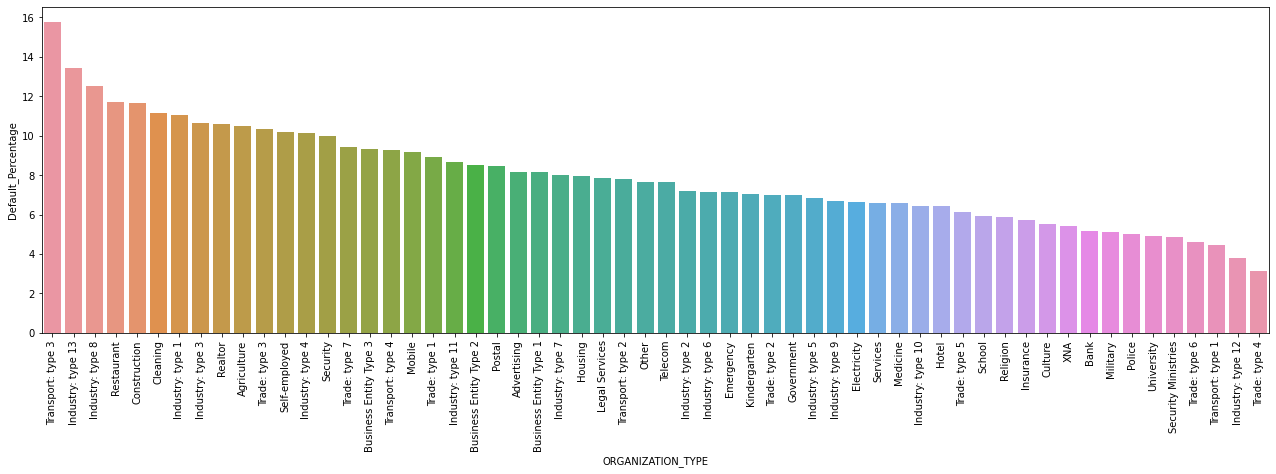

In [99]:
f, ax = plt.subplots(figsize=(22,6))
OrganizationType_vs_Target= sns.barplot(x="ORGANIZATION_TYPE",y="Default_Percentage",data=test_df9
                                         ,order=test_df9['ORGANIZATION_TYPE'])
OrganizationType_vs_Target.set_xticklabels(OrganizationType_vs_Target.get_xticklabels(), rotation=90)
OrganizationType_vs_Target

From above graph, highest number of non-repayment can be seen in Applicants who work in Transport Type3.

_NAME_HOUSING_TYPE_

[Text(0, 0, 'House / apartment'),
 Text(0, 0, 'Rented apartment'),
 Text(0, 0, 'With parents'),
 Text(0, 0, 'Municipal apartment'),
 Text(0, 0, 'Office apartment'),
 Text(0, 0, 'Co-op apartment')]

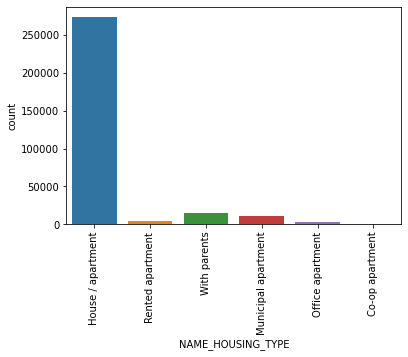

In [100]:
#graph to plot housing type of each client in the entire polulation
HousingType_vs_Total = sns.countplot("NAME_HOUSING_TYPE",data =application_data)
HousingType_vs_Total.set_xticklabels(HousingType_vs_Total.get_xticklabels(),rotation=90)

In [101]:
#find the percentage housing type of each client the defaulter list
test_df10=round((Univariate_defaulter_Cat_1_df["NAME_HOUSING_TYPE"].value_counts()/application_data["NAME_HOUSING_TYPE"].value_counts())*100,2)
test_df10 = pd.DataFrame(test_df10)
test_df10.reset_index(level=0, inplace=True)
test_df10.rename(columns=  {"index": "NAME_HOUSING_TYPE", 
                     "NAME_HOUSING_TYPE":"Default_Percentage"}, 
                                 inplace = True) 
test_df10.sort_values(by = 'Default_Percentage' , inplace = True, ascending = False)
test_df10

,NAME_HOUSING_TYPE,Default_Percentage
3,Rented apartment,12.31
1,With parents,11.70
2,Municipal apartment,8.54
5,Co-op apartment,7.93
0,House / apartment,7.80
4,Office apartment,6.57


[Text(0, 0, 'Rented apartment'),
 Text(0, 0, 'With parents'),
 Text(0, 0, 'Municipal apartment'),
 Text(0, 0, 'Co-op apartment'),
 Text(0, 0, 'House / apartment'),
 Text(0, 0, 'Office apartment')]

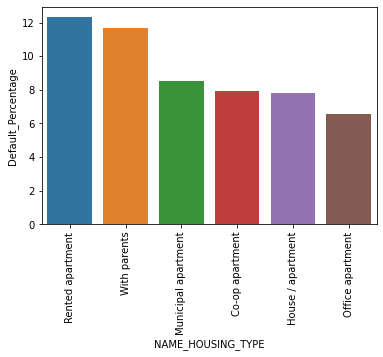

In [102]:
#plot to show the housing type of each client client vs. Target variable. Here, Target =1
HousingType_vs_Target= sns.barplot(x="NAME_HOUSING_TYPE",y="Default_Percentage",data=test_df10)
HousingType_vs_Target.set_xticklabels(HousingType_vs_Target.get_xticklabels(),rotation=90)

From above graph it can be seen clearly that people with rented apartments are less likely to pay back their loans. This can be because they already have more liabilities compared to other type of people who do not have thia liability.

## BIVARIATE ANALYSIS

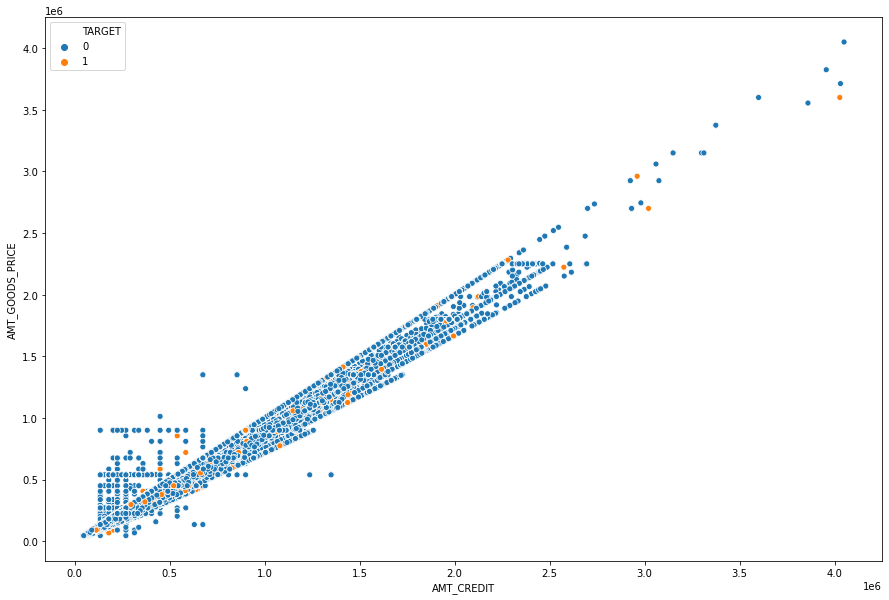

In [103]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot("AMT_CREDIT","AMT_GOODS_PRICE",data=application_data,hue="TARGET")

### Salary Category vs Clinet who provided Home Number

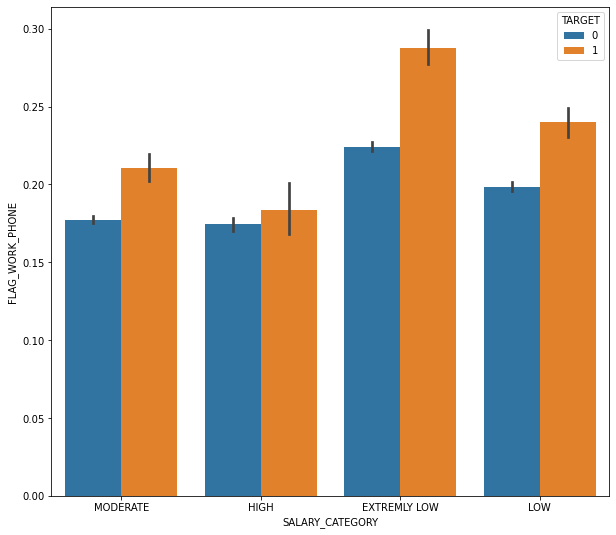

In [104]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","FLAG_WORK_PHONE",data=application_data,hue="TARGET")

Client with Extremly low salary has more chance to be a Defaulter, when he did not provide the Home phone number. Here approximately 30% people only produced the phone number

### Salary vs Client whose Permanent Address not match with Contact Address -Region Level

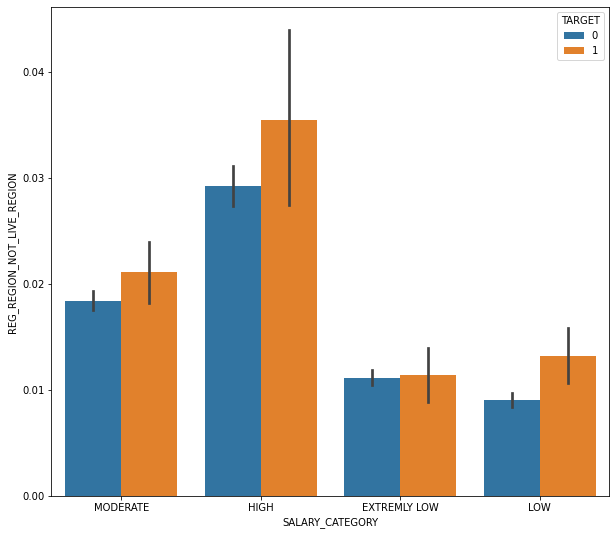

In [105]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_REGION_NOT_LIVE_REGION",data=application_data,hue="TARGET")

When Client gets Extremply lower salary and if his/her address doest match, then there is a Higher chance for him/her to be defaulter

### Salary vs Client whose Permanent Address not match with Work Address - Region Level

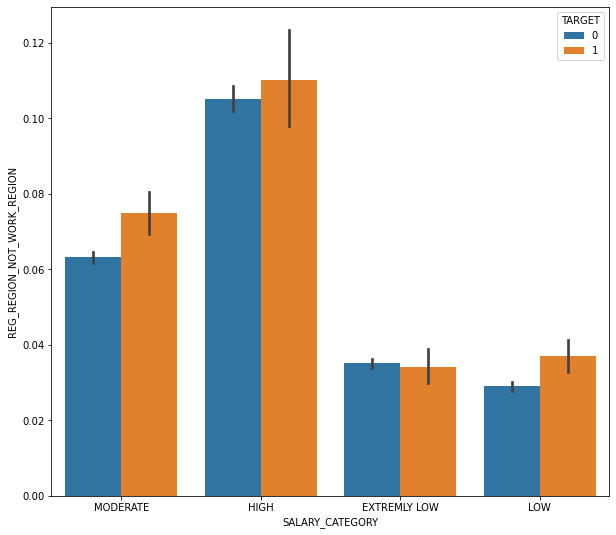

In [106]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_REGION_NOT_WORK_REGION",data=application_data,hue="TARGET")

When Client gets Extremply lower salary and if his/her Work address doest match, then there is a Higher chance for him/her to be defaulter

### Salary vs Client whose Permanent Address not match with Contact Address -City Level

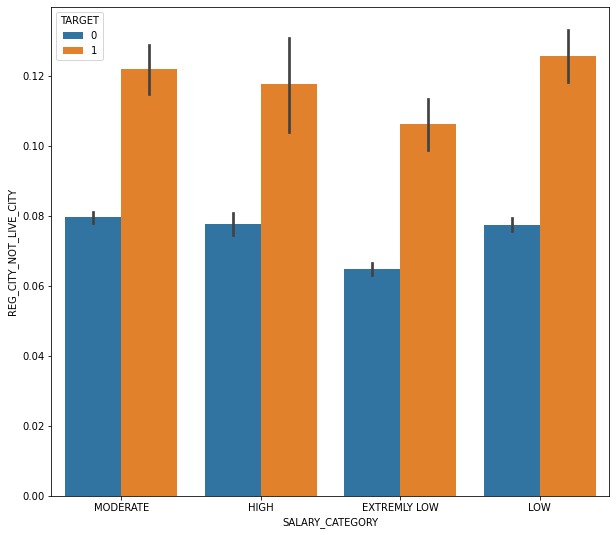

In [107]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_CITY_NOT_LIVE_CITY",data=application_data,hue="TARGET")

When Client gets LOWER salary and if his/her CONTACT address(CITY-LEVEL)doest match, then there is a Higher chance for him/her to be defaulter

### Salary vs Client whose Permanent Address not match with Work Address -City Level

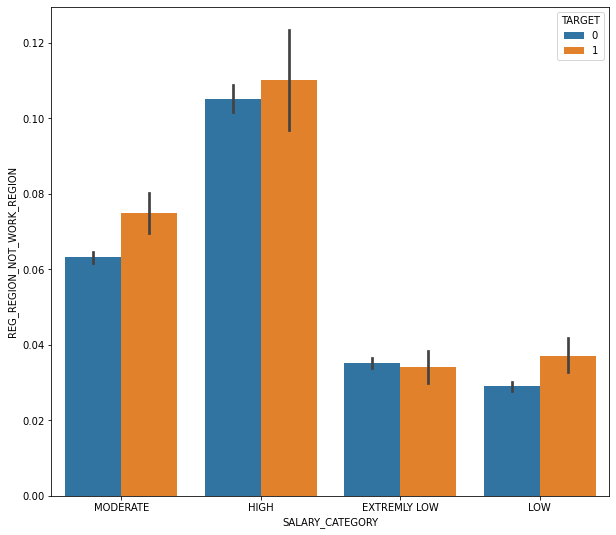

In [108]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_REGION_NOT_WORK_REGION",data=application_data,hue="TARGET")

When Client gets LOWER salary and if his/her WORK address(CITY-LEVEL)doest match, then there is a Higher chance for him/her to be defaulter

## INCOME TYPE

### Income vs Children count

[Text(0, 0, 'Working'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Maternity leave')]

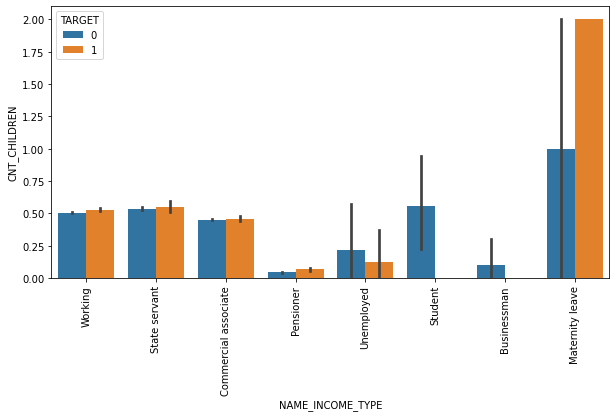

In [110]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","CNT_CHILDREN",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

People who geting income via Maternity Leave tends to be more Defaulter when they have more children

### Income vs No.of.FamilyMembers

[Text(0, 0, 'Working'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Maternity leave')]

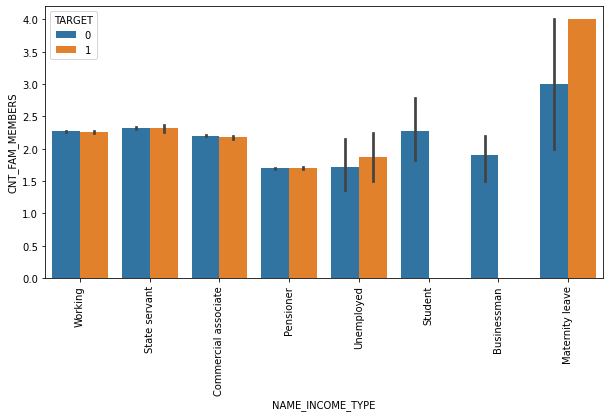

In [111]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","CNT_FAM_MEMBERS",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

People who geting income via Maternity Leave tends to be more Defaulter when they have more Family Members

### Income Type vs Client whose Permanent Address not match with Contact Address -Region Level

[Text(0, 0, 'Working'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Maternity leave')]

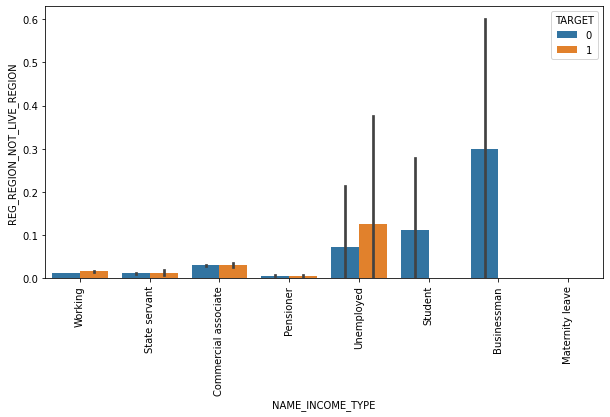

In [112]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","REG_REGION_NOT_LIVE_REGION",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Client who are Unemployed has more chance to be a defaulter , when their Permanent Address does not match with the Contact Address in the Regional Level

--------

# FAMILY STATUS

### Family Status vs Count Of Children

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Unknown')]

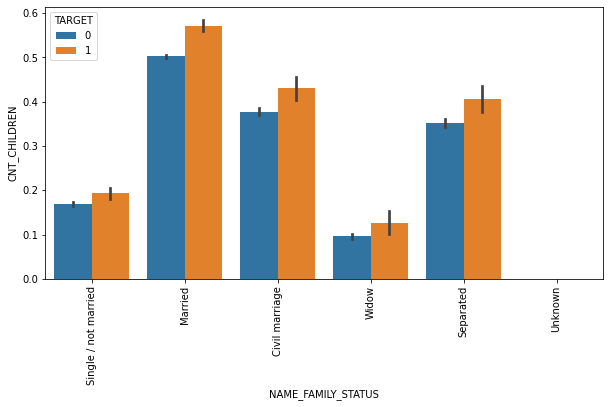

In [113]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","CNT_CHILDREN",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Client who are married and has more children (5+), chances to be a defaulter in High. This may be due to the Economic situation of their family, because of more children

### Family Status vs Count Of Family Members

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Unknown')]

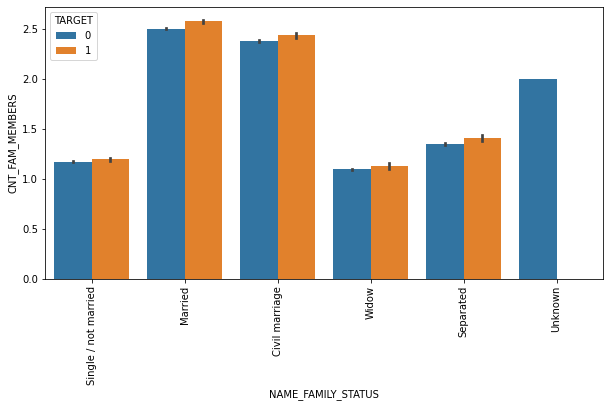

In [114]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","CNT_FAM_MEMBERS",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Client who are married and has more children (5+), chances to be a defaulter in High. This may be due to the Economic situation of their family, because of more children

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Unknown')]

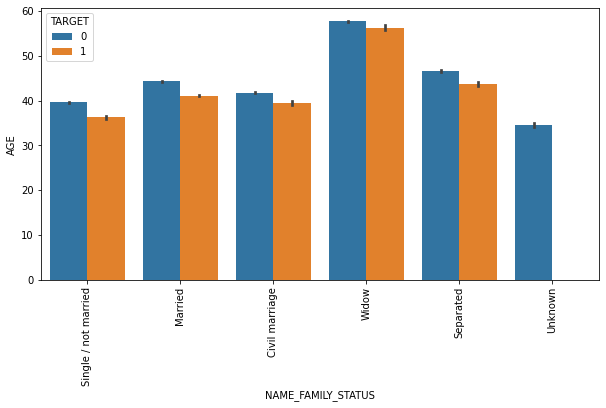

In [115]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","AGE",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Based on the Bivariate analyses, few columns proved to be of no use, so we are dropping them

In [117]:
application_data.drop(["HOUR_APPR_PROCESS_START","FLAG_MOBIL"],axis=1,inplace=True)

KeyError: "['HOUR_APPR_PROCESS_START' 'FLAG_MOBIL'] not found in axis"

## ANALYSING CORRELATION OF TARGET VARIABLE VS OTHER VARIABLES

In [118]:
Correlation = application_data.corr()
Correlation.sort_values(by=["TARGET"],ascending=False,inplace=True)


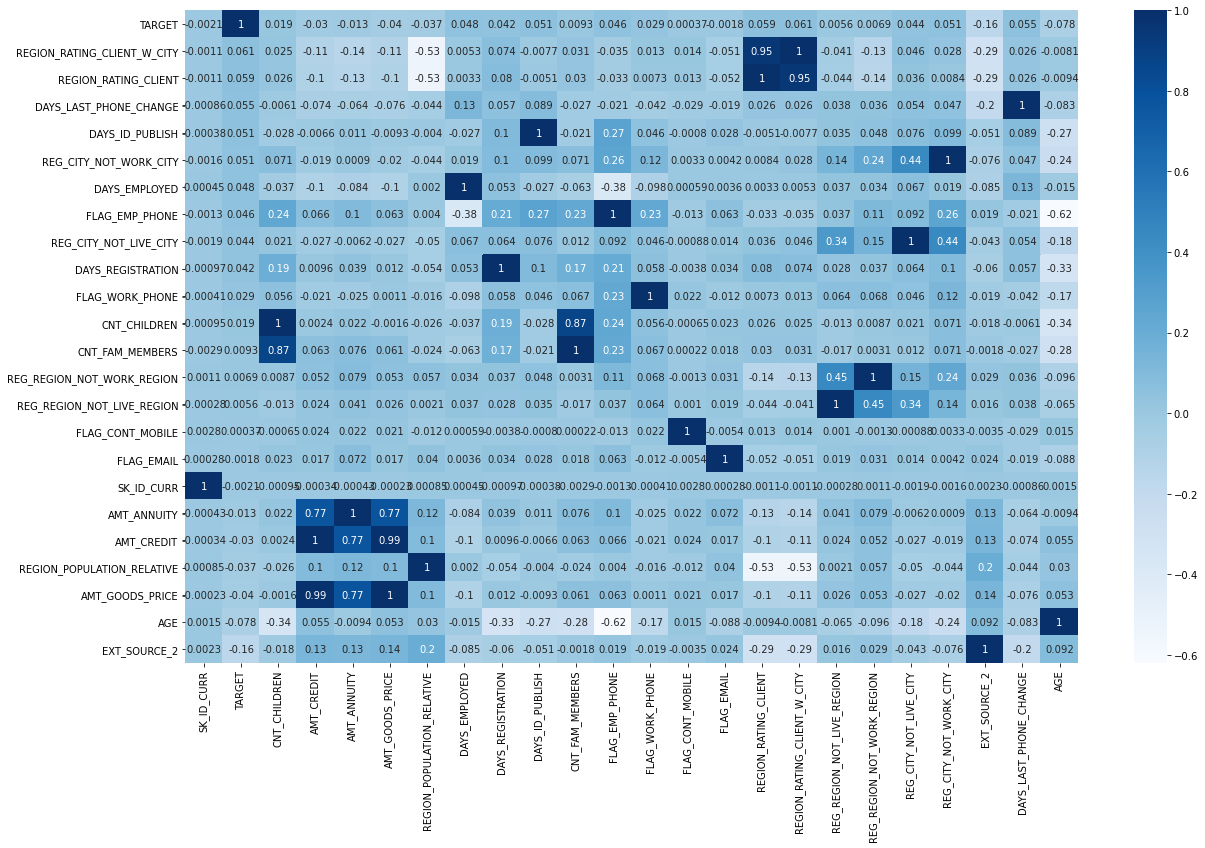

In [152]:
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True,cmap='Blues')

In [153]:
Correlation.head(6)["TARGET"][1:]

REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

In [154]:
Correlation.tail(5)["TARGET"]

AMT_CREDIT                   -0.030369
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039628
AGE                          -0.078263
EXT_SOURCE_2                 -0.160303
Name: TARGET, dtype: float64

### Highly Correlated Variables
1. AMT_CREDIT and AMT_GOODS_PRICE =0.99
2. REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT = 0.95
3. CNT_FAM_MEMBERS and CNT_CHILDREN = 0.87
4. AMT_ANNUITY and AMT_CREDIT = 0.77

# Analysing Previous Application

In [155]:
#Reading previous.csv Data
previous_data = pd.read_csv('/Users/bharath/Desktop/DS_ENV/PGDDS/EDA_CASE_STUDY/previous_application.csv')
previous_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [156]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [157]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(previous_data.isnull().sum() * 100 / len(previous_data)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [159]:
#method to calculate percentage of NaN values in DataFrame
def get_perc_of_missing_values(series):
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 3)
get_perc_of_missing_values(previous_data)

SK_ID_PREV                     0.000
SK_ID_CURR                     0.000
NAME_CONTRACT_TYPE             0.000
AMT_ANNUITY                    0.223
AMT_APPLICATION                0.000
AMT_CREDIT                     0.000
AMT_DOWN_PAYMENT               0.536
AMT_GOODS_PRICE                0.231
WEEKDAY_APPR_PROCESS_START     0.000
HOUR_APPR_PROCESS_START        0.000
FLAG_LAST_APPL_PER_CONTRACT    0.000
NFLAG_LAST_APPL_IN_DAY         0.000
RATE_DOWN_PAYMENT              0.536
RATE_INTEREST_PRIMARY          0.996
RATE_INTEREST_PRIVILEGED       0.996
NAME_CASH_LOAN_PURPOSE         0.000
NAME_CONTRACT_STATUS           0.000
DAYS_DECISION                  0.000
NAME_PAYMENT_TYPE              0.000
CODE_REJECT_REASON             0.000
NAME_TYPE_SUITE                0.491
NAME_CLIENT_TYPE               0.000
NAME_GOODS_CATEGORY            0.000
NAME_PORTFOLIO                 0.000
NAME_PRODUCT_TYPE              0.000
CHANNEL_TYPE                   0.000
SELLERPLACE_AREA               0.000
N

In [160]:
# Iterate over columns in DataFrame and delete those with where >20% of the values are null
for col, values in previous_data.iteritems():
    if get_perc_of_missing_values(previous_data[col]) > 0.20:
        previous_data.drop(col, axis=1, inplace=True)
previous_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,267295.5,311400.0,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,87750.0,64291.5,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,105237.0,102523.5,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,180000.0,191880.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,low_normal,Cash X-Sell: low


In [163]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(previous_data.isnull().sum() * 100 / len(previous_data)).round(2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [164]:
previous_data.shape

(1670214, 23)

In [165]:
# Filling 2% missing value with the Highest Mode in PRODUCT_COMBINATION column
previous_data["PRODUCT_COMBINATION"].fillna(previous_data["PRODUCT_COMBINATION"].mode()[0],inplace=True)

### Let's start visualising so as to get some viable inference

**Contract Status**

In [166]:
Contract_Status = previous_data['NAME_CONTRACT_STATUS']
Contract_Status

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object

In [167]:
#find the percentage of contract status 
df_1=round((Contract_Status.value_counts()/previous_data["NAME_CONTRACT_STATUS"].count())*100,2)
df_1 = pd.DataFrame(df_1)
df_1.reset_index(level=0, inplace=True)
df_1.rename(columns=  {"index": "NAME_CONTRACT_STATUS", 
                     "NAME_CONTRACT_STATUS":"Percentage_of_Values"}, 
                                 inplace = True) 
df_1.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_1

,NAME_CONTRACT_STATUS,Percentage_of_Values
0,Approved,62.07
1,Canceled,18.94
2,Refused,17.40
3,Unused offer,1.58


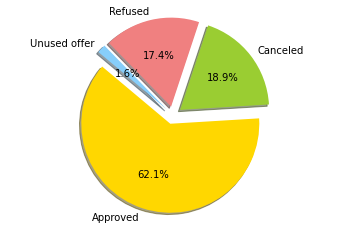

In [168]:
# Data to plot
labels = 'Approved', 'Canceled', 'Refused', 'Unused offer'
sizes = df_1['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**Client Type**

In [169]:
Client_Type = previous_data['NAME_CLIENT_TYPE']
Client_Type

0           Repeater
1           Repeater
2           Repeater
3           Repeater
4           Repeater
             ...    
1670209    Refreshed
1670210          New
1670211     Repeater
1670212     Repeater
1670213     Repeater
Name: NAME_CLIENT_TYPE, Length: 1670214, dtype: object

In [170]:
#find the percentage of contract status 
df_2=round((Client_Type.value_counts()/previous_data["NAME_CLIENT_TYPE"].count())*100,2)
df_2 = pd.DataFrame(df_2)
df_2.reset_index(level=0, inplace=True)
df_2.rename(columns=  {"index": "NAME_CLIENT_TYPE", 
                     "NAME_CLIENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_2.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_2

,NAME_CLIENT_TYPE,Percentage_of_Values
0,Repeater,73.72
1,New,18.04
2,Refreshed,8.12
3,XNA,0.12


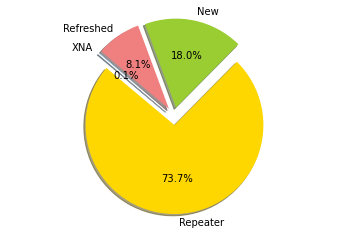

In [171]:
# Data to plot
labels = 'Repeater', 'New', 'Refreshed', 'XNA'
sizes = df_2['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

73.4% applicants are repeaters. Only, 18.4% are new clients.

In [172]:
Contract_Type = previous_data['NAME_CONTRACT_TYPE']
Contract_Type

0          Consumer loans
1              Cash loans
2              Cash loans
3              Cash loans
4              Cash loans
                ...      
1670209    Consumer loans
1670210    Consumer loans
1670211    Consumer loans
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

In [173]:
#find the percentage of contract status 
df_3=round((Contract_Type.value_counts()/previous_data["NAME_CONTRACT_TYPE"].count())*100,2)
df_3 = pd.DataFrame(df_3)
df_3.reset_index(level=0, inplace=True)
df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE", 
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_3

,NAME_CONTRACT_TYPE,Percentage_of_Values
0,Cash loans,44.76
1,Consumer loans,43.66
2,Revolving loans,11.57
3,XNA,0.02


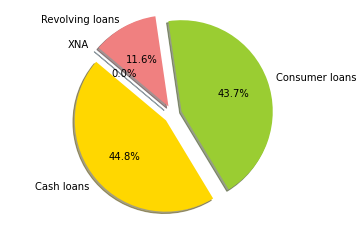

In [174]:
# Data to plot
labels = 'Cash loans', 'Consumer loans', 'Revolving loans', 'XNA'
sizes = df_3['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**Days of approval - WEEKDAY_APPR_PROCESS_START**

In [175]:
Approval_days = previous_data['WEEKDAY_APPR_PROCESS_START']
Approval_days

0           SATURDAY
1           THURSDAY
2            TUESDAY
3             MONDAY
4           THURSDAY
             ...    
1670209    WEDNESDAY
1670210      TUESDAY
1670211       MONDAY
1670212    WEDNESDAY
1670213       SUNDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 1670214, dtype: object

In [176]:
#find the percentage of contract status 
df_4=round((Approval_days.value_counts()/previous_data["WEEKDAY_APPR_PROCESS_START"].count())*100,2)
df_4 = pd.DataFrame(df_4)
df_4.reset_index(level=0, inplace=True)
df_4.rename(columns=  {"index": "WEEKDAY_APPR_PROCESS_START", 
                     "WEEKDAY_APPR_PROCESS_START":"Percentage_of_Values"}, 
                                 inplace = True) 
df_4.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
df_4

,WEEKDAY_APPR_PROCESS_START,Percentage_of_Values
0,TUESDAY,15.27
1,WEDNESDAY,15.27
2,MONDAY,15.18
3,FRIDAY,15.09
4,THURSDAY,14.91
5,SATURDAY,14.41
6,SUNDAY,9.86


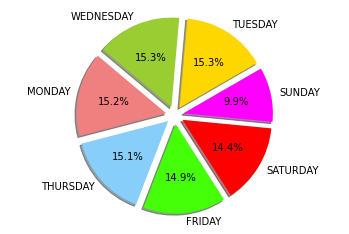

In [177]:
# Data to plot
labels = 'TUESDAY', 'WEDNESDAY', 'MONDAY', 'THURSDAY' , 'FRIDAY' , 'SATURDAY' , 'SUNDAY' 
sizes = df_4['Percentage_of_Values']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , '#44FF07' ,'Red','Fuchsia']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=30)

plt.axis('equal')
plt.show()

Most of the clients have opted to apply loan on Tuesday.
It is very interesting to see that applicants are very low on weekends.
We would otherwise assume that the applicants would prefer weekends to apply.

**Purpose of loan  - NAME_CASH_LOAN_PURPOSE**

In [178]:
previous_data.NAME_CASH_LOAN_PURPOSE

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [179]:
Loan_Purpose = previous_data['NAME_CASH_LOAN_PURPOSE']
Loan_Purpose

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [180]:
#find the percentage of Loan Purpose
df_5=round((Loan_Purpose.value_counts()/previous_data["NAME_CASH_LOAN_PURPOSE"].count())*100,2)
df_5 = pd.DataFrame(df_5)
df_5.reset_index(level=0, inplace=True)
df_5.rename(columns=  {"index": "NAME_CASH_LOAN_PURPOSE", 
                     "NAME_CASH_LOAN_PURPOSE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_5.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_5

,NAME_CASH_LOAN_PURPOSE,Percentage_of_Values
0,XAP,55.24
1,XNA,40.59
2,Repairs,1.42
3,Other,0.93
4,Urgent needs,0.50
5,Buying a used car,0.17
6,Building a house or an annex,0.16
7,Everyday expenses,0.14
8,Medicine,0.13
9,Payments on other loans,0.12


[Text(0, 0, 'XAP'),
 Text(0, 0, 'XNA'),
 Text(0, 0, 'Repairs'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Urgent needs'),
 Text(0, 0, 'Buying a used car'),
 Text(0, 0, 'Building a house or an annex'),
 Text(0, 0, 'Everyday expenses'),
 Text(0, 0, 'Medicine'),
 Text(0, 0, 'Payments on other loans'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Journey'),
 Text(0, 0, 'Wedding / gift / holiday'),
 Text(0, 0, 'Purchase of electronic equipment'),
 Text(0, 0, 'Buying a new car'),
 Text(0, 0, 'Buying a home'),
 Text(0, 0, 'Car repairs'),
 Text(0, 0, 'Furniture'),
 Text(0, 0, 'Buying a holiday home / land'),
 Text(0, 0, 'Business development'),
 Text(0, 0, 'Gasification / water supply'),
 Text(0, 0, 'Buying a garage'),
 Text(0, 0, 'Hobby'),
 Text(0, 0, 'Money for a third person'),
 Text(0, 0, 'Refusal to name the goal')]

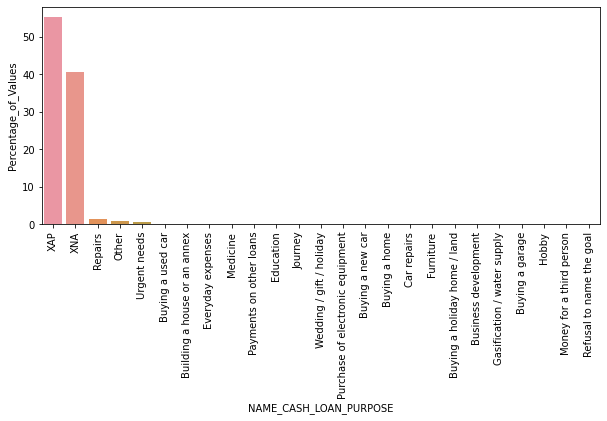

In [181]:
f, ax = plt.subplots(figsize=(10,4))
plot_2=sns.barplot("NAME_CASH_LOAN_PURPOSE","Percentage_of_Values",data=df_5)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

> Most Loan purpose was not recorded. **XAP and XNA** values are highest.

**Payment type - NAME_PAYMENT_TYPE**

In [182]:
Payment_Type = previous_data['NAME_PAYMENT_TYPE']
#find the percentage of Payment Type
df_6=round((Payment_Type.value_counts()/previous_data["NAME_PAYMENT_TYPE"].count())*100,2)
df_6 = pd.DataFrame(df_6)
df_6.reset_index(level=0, inplace=True)
df_6.rename(columns=  {"index": "NAME_PAYMENT_TYPE", 
                     "NAME_PAYMENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_6.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_6

,NAME_PAYMENT_TYPE,Percentage_of_Values
0,Cash through the bank,61.88
1,XNA,37.56
2,Non-cash from your account,0.49
3,Cashless from the account of the employer,0.06


[Text(0, 0, 'Cash through the bank'),
 Text(0, 0, 'XNA'),
 Text(0, 0, 'Non-cash from your account'),
 Text(0, 0, 'Cashless from the account of the employer')]

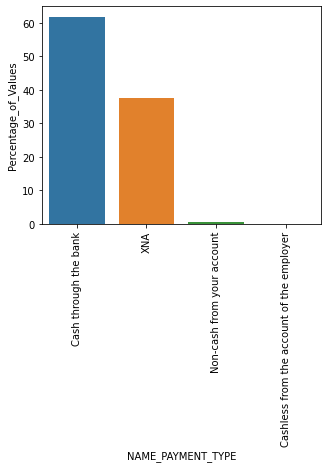

In [183]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_PAYMENT_TYPE","Percentage_of_Values",data=df_6)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most people preferred **CASH(62.44%)** as the mode of Payment

**Reason of rejection of loan - CODE_REJECT_REASON**

In [184]:
Code_Rejection = previous_data['CODE_REJECT_REASON']
#find the percentage of Payment Type
df_7=round((Code_Rejection.value_counts()/previous_data["CODE_REJECT_REASON"].count())*100,2)
df_7 = pd.DataFrame(df_7)
df_7.reset_index(level=0, inplace=True)
df_7.rename(columns=  {"index": "CODE_REJECT_REASON", 
                     "CODE_REJECT_REASON":"Percentage_of_Values"}, 
                                 inplace = True) 
df_7.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_7

,CODE_REJECT_REASON,Percentage_of_Values
0,XAP,81.01
1,HC,10.49
2,LIMIT,3.33
3,SCO,2.24
4,CLIENT,1.58
5,SCOFR,0.77
6,XNA,0.31
7,VERIF,0.21
8,SYSTEM,0.04


[Text(0, 0, 'XAP'),
 Text(0, 0, 'HC'),
 Text(0, 0, 'LIMIT'),
 Text(0, 0, 'SCO'),
 Text(0, 0, 'CLIENT'),
 Text(0, 0, 'SCOFR'),
 Text(0, 0, 'XNA'),
 Text(0, 0, 'VERIF'),
 Text(0, 0, 'SYSTEM')]

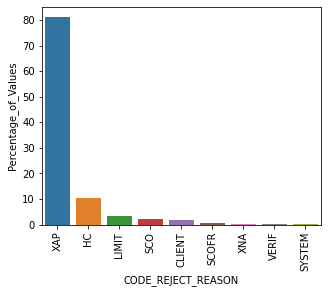

In [185]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("CODE_REJECT_REASON","Percentage_of_Values",data=df_7)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Primary reason for the Loan to get rejected is not recorded(**XAP (81%)**) followed by **HC**.

**What kind of goods did the client apply for in the previous application - NAME_GOODS_CATEGORY**

In [186]:
Goods_Category= previous_data['NAME_GOODS_CATEGORY']
#find the percentage of Goods Client applied for
df_8=round((Goods_Category.value_counts()/previous_data["NAME_GOODS_CATEGORY"].count())*100,2)
df_8 = pd.DataFrame(df_8)
df_8.reset_index(level=0, inplace=True)
df_8.rename(columns=  {"index": "NAME_GOODS_CATEGORY", 
                     "NAME_GOODS_CATEGORY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_8.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_8

,NAME_GOODS_CATEGORY,Percentage_of_Values
0,XNA,56.93
1,Mobile,13.45
2,Consumer Electronics,7.28
3,Computers,6.33
4,Audio/Video,5.95
5,Furniture,3.21
6,Photo / Cinema Equipment,1.50
7,Construction Materials,1.50
8,Clothing and Accessories,1.41
9,Auto Accessories,0.44


[Text(0, 0, 'XNA'),
 Text(0, 0, 'Mobile'),
 Text(0, 0, 'Consumer Electronics'),
 Text(0, 0, 'Computers'),
 Text(0, 0, 'Audio/Video'),
 Text(0, 0, 'Furniture'),
 Text(0, 0, 'Photo / Cinema Equipment'),
 Text(0, 0, 'Construction Materials'),
 Text(0, 0, 'Clothing and Accessories'),
 Text(0, 0, 'Auto Accessories'),
 Text(0, 0, 'Jewelry'),
 Text(0, 0, 'Homewares'),
 Text(0, 0, 'Medical Supplies'),
 Text(0, 0, 'Vehicles'),
 Text(0, 0, 'Sport and Leisure'),
 Text(0, 0, 'Gardening'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Office Appliances'),
 Text(0, 0, 'Tourism'),
 Text(0, 0, 'Medicine'),
 Text(0, 0, 'Direct Sales'),
 Text(0, 0, 'Fitness'),
 Text(0, 0, 'Additional Service'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Weapon'),
 Text(0, 0, 'Insurance'),
 Text(0, 0, 'Animals'),
 Text(0, 0, 'House Construction')]

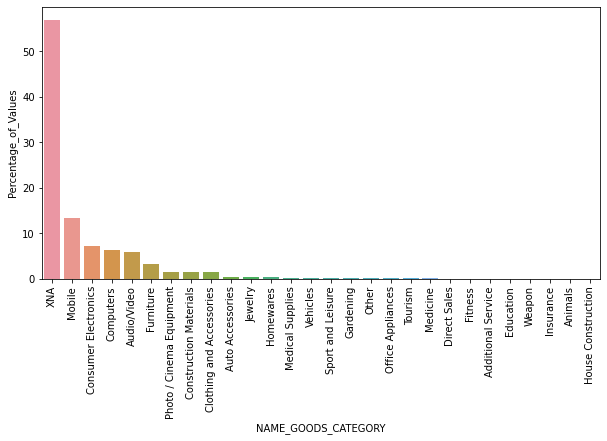

In [187]:
f, ax = plt.subplots(figsize=(10,5))
plot_2=sns.barplot("NAME_GOODS_CATEGORY","Percentage_of_Values",data=df_8)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most clients applied for Mobile and 53.96% of the data is not recorded(XNA).

**Was the previous application for CASH, POS, CAR, … - NAME_PORTFOLIO**

In [188]:
Portfolio= previous_data['NAME_PORTFOLIO']
#find the percentage of Portfolio
df_9=round((Portfolio.value_counts()/previous_data["NAME_PORTFOLIO"].count())*100,2)
df_9 = pd.DataFrame(df_9)
df_9.reset_index(level=0, inplace=True)
df_9.rename(columns=  {"index": "NAME_PORTFOLIO", 
                     "NAME_PORTFOLIO":"Percentage_of_Values"}, 
                                 inplace = True) 
df_9.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_9

,NAME_PORTFOLIO,Percentage_of_Values
0,POS,41.37
1,Cash,27.63
2,XNA,22.29
3,Cards,8.68
4,Cars,0.03


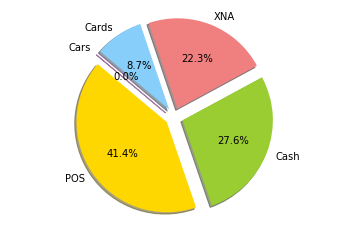

In [189]:
# Data to plot
labels = df_9.NAME_PORTFOLIO
sizes = df_9.Percentage_of_Values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','Fuchsia']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

41.4% of the applications were for POS.

**Was the previous application x-sell or walk-in - NAME_PRODUCT_TYPE**

In [190]:
Product_Type= previous_data['NAME_PRODUCT_TYPE']
#find the percentage of Product Type 
df_10=round((Product_Type.value_counts()/previous_data["NAME_PRODUCT_TYPE"].count())*100,2)
df_10 = pd.DataFrame(df_10)
df_10.reset_index(level=0, inplace=True)
df_10.rename(columns=  {"index": "NAME_PRODUCT_TYPE", 
                     "NAME_PRODUCT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_10.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_10

,NAME_PRODUCT_TYPE,Percentage_of_Values
0,XNA,63.68
1,x-sell,27.32
2,walk-in,9.00


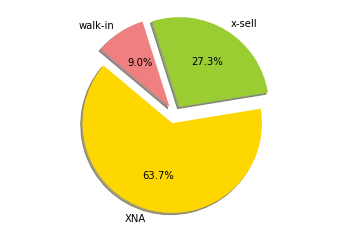

In [191]:
# Data to plot
labels = df_10.NAME_PRODUCT_TYPE
sizes = df_10.Percentage_of_Values
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

X-sell applications were more than walk-in

**Through which channel we acquired the client on the previous application - CHANNEL_TYPE**

In [192]:
Channel_Type= previous_data['CHANNEL_TYPE']
#find the percentage of Channels via which client applied loan for
df_11=round((Channel_Type.value_counts()/previous_data["CHANNEL_TYPE"].count())*100,2)
df_11 = pd.DataFrame(df_11)
df_11.reset_index(level=0, inplace=True)
df_11.rename(columns=  {"index": "CHANNEL_TYPE", 
                     "CHANNEL_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
df_11.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_11

,CHANNEL_TYPE,Percentage_of_Values
0,Credit and cash offices,43.11
1,Country-wide,29.62
2,Stone,12.70
3,Regional / Local,6.50
4,Contact center,4.27
5,AP+ (Cash loan),3.42
6,Channel of corporate sales,0.37
7,Car dealer,0.03


[Text(0, 0, 'Credit and cash offices'),
 Text(0, 0, 'Country-wide'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'Regional / Local'),
 Text(0, 0, 'Contact center'),
 Text(0, 0, 'AP+ (Cash loan)'),
 Text(0, 0, 'Channel of corporate sales'),
 Text(0, 0, 'Car dealer')]

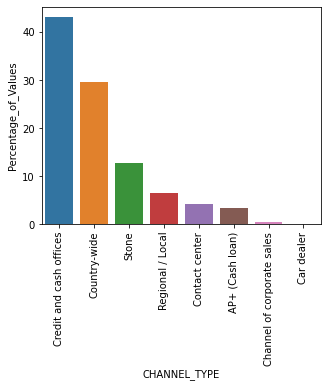

In [193]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("CHANNEL_TYPE","Percentage_of_Values",data=df_11)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most clients were asquired from **Credit and Cash Offices**

**The industry of the seller - NAME_SELLER_INDUSTRY**

In [194]:
Seller_Industry= previous_data['NAME_SELLER_INDUSTRY']
#find the percentage of Goods Client applied for
df_12=round((Seller_Industry.value_counts()/previous_data["NAME_SELLER_INDUSTRY"].count())*100,2)
df_12 = pd.DataFrame(df_12)
df_12.reset_index(level=0, inplace=True)
df_12.rename(columns=  {"index": "NAME_SELLER_INDUSTRY", 
                     "NAME_SELLER_INDUSTRY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_12.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_12

,NAME_SELLER_INDUSTRY,Percentage_of_Values
0,XNA,51.23
1,Consumer electronics,23.85
2,Connectivity,16.53
3,Furniture,3.46
4,Construction,1.78
5,Clothing,1.43
6,Industry,1.15
7,Auto technology,0.30
8,Jewelry,0.16
9,MLM partners,0.07


[Text(0, 0, 'XNA'),
 Text(0, 0, 'Consumer electronics'),
 Text(0, 0, 'Connectivity'),
 Text(0, 0, 'Furniture'),
 Text(0, 0, 'Construction'),
 Text(0, 0, 'Clothing'),
 Text(0, 0, 'Industry'),
 Text(0, 0, 'Auto technology'),
 Text(0, 0, 'Jewelry'),
 Text(0, 0, 'MLM partners'),
 Text(0, 0, 'Tourism')]

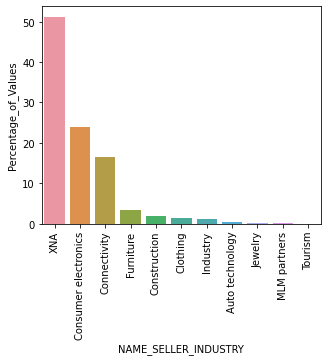

In [195]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_SELLER_INDUSTRY","Percentage_of_Values",data=df_12)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most Sellers are from **Consumer electronics**

**Grouped interest rate into small medium and high of the previous application - NAME_YIELD_GROUP**

In [196]:
Yield_Groups= previous_data['NAME_YIELD_GROUP']
#find the percentage of Interest rate into small medium and high
df_13=round((Yield_Groups.value_counts()/previous_data["NAME_YIELD_GROUP"].count())*100,2)
df_13 = pd.DataFrame(df_13)
df_13.reset_index(level=0, inplace=True)
df_13.rename(columns=  {"index": "NAME_YIELD_GROUP", 
                     "NAME_YIELD_GROUP":"Percentage_of_Values"}, 
                                 inplace = True) 
df_13.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_13

,NAME_YIELD_GROUP,Percentage_of_Values
0,XNA,30.97
1,middle,23.08
2,high,21.15
3,low_normal,19.28
4,low_action,5.51


[Text(0, 0, 'XNA'),
 Text(0, 0, 'middle'),
 Text(0, 0, 'high'),
 Text(0, 0, 'low_normal'),
 Text(0, 0, 'low_action')]

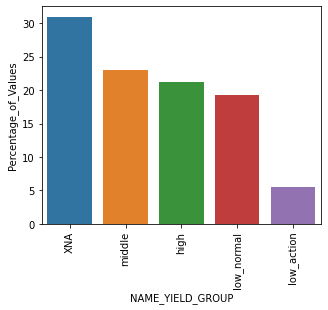

In [197]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_YIELD_GROUP","Percentage_of_Values",data=df_13)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Most group interest rates lie in middle.

**Detailed product combination of the previous application - PRODUCT_COMBINATION**

In [198]:
Product_Combination= previous_data['PRODUCT_COMBINATION']
#find the percentage of Different Product Combinations
df_14=round((Product_Combination.value_counts()/previous_data["PRODUCT_COMBINATION"].count())*100,2)
df_14 = pd.DataFrame(df_14)
df_14.reset_index(level=0, inplace=True)
df_14.rename(columns=  {"index": "PRODUCT_COMBINATION", 
                     "PRODUCT_COMBINATION":"Percentage_of_Values"}, 
                                 inplace = True) 
df_14.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_14

,PRODUCT_COMBINATION,Percentage_of_Values
0,Cash,17.14
1,POS household with interest,15.78
2,POS mobile with interest,13.21
3,Cash X-Sell: middle,8.61
4,Cash X-Sell: low,7.80
5,Card Street,6.74
6,POS industry with interest,5.92
7,POS household without interest,4.96
8,Card X-Sell,4.82
9,Cash Street: high,3.57


[Text(0, 0, 'Cash'),
 Text(0, 0, 'POS household with interest'),
 Text(0, 0, 'POS mobile with interest'),
 Text(0, 0, 'Cash X-Sell: middle'),
 Text(0, 0, 'Cash X-Sell: low'),
 Text(0, 0, 'Card Street'),
 Text(0, 0, 'POS industry with interest'),
 Text(0, 0, 'POS household without interest'),
 Text(0, 0, 'Card X-Sell'),
 Text(0, 0, 'Cash Street: high'),
 Text(0, 0, 'Cash X-Sell: high'),
 Text(0, 0, 'Cash Street: middle'),
 Text(0, 0, 'Cash Street: low'),
 Text(0, 0, 'POS mobile without interest'),
 Text(0, 0, 'POS other with interest'),
 Text(0, 0, 'POS industry without interest'),
 Text(0, 0, 'POS others without interest')]

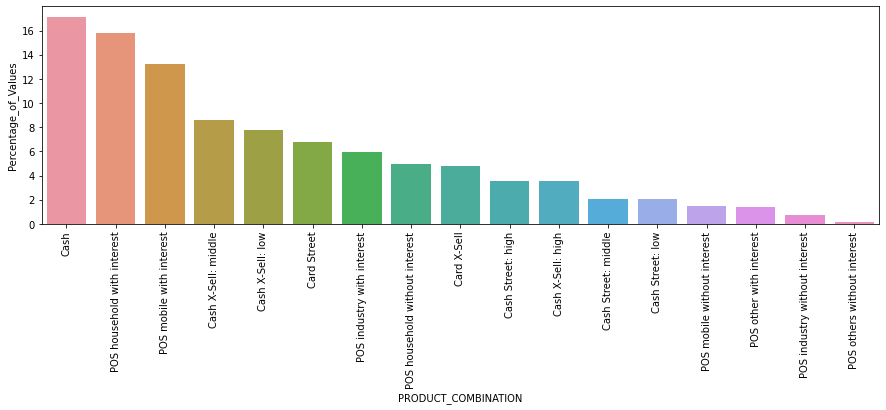

In [201]:
f, ax = plt.subplots(figsize=(15,4))
plot_2=sns.barplot("PRODUCT_COMBINATION","Percentage_of_Values",data=df_14)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

Highest product combination is **Cash** followed by **POS household with interest**

**Flag if the application was the last application per day of the client - NFLAG_LAST_APPL_IN_DAY**

In [202]:
Insurance= previous_data['NFLAG_LAST_APPL_IN_DAY']
#find the percentage of Client requested Insurance
df_15=round((Insurance.value_counts()/previous_data["NFLAG_LAST_APPL_IN_DAY"].count())*100,2)
df_15 = pd.DataFrame(df_15)
df_15.reset_index(level=0, inplace=True)
df_15.rename(columns=  {"index": "INSURANCE_FLAG", 
                     "NFLAG_LAST_APPL_IN_DAY":"Percentage_of_Values"}, 
                                 inplace = True) 
df_15.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
df_15

,INSURANCE_FLAG,Percentage_of_Values
0,1,99.65
1,0,0.35


[Text(0, 0, '0'), Text(0, 0, '1')]

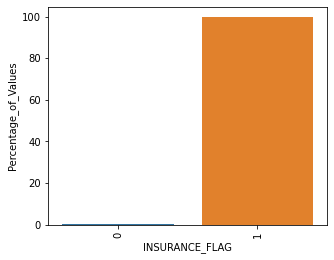

In [203]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("INSURANCE_FLAG","Percentage_of_Values",data=df_15)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)

For most clients it was the last application of the day.

In [204]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

**Correlation in previous_data df**

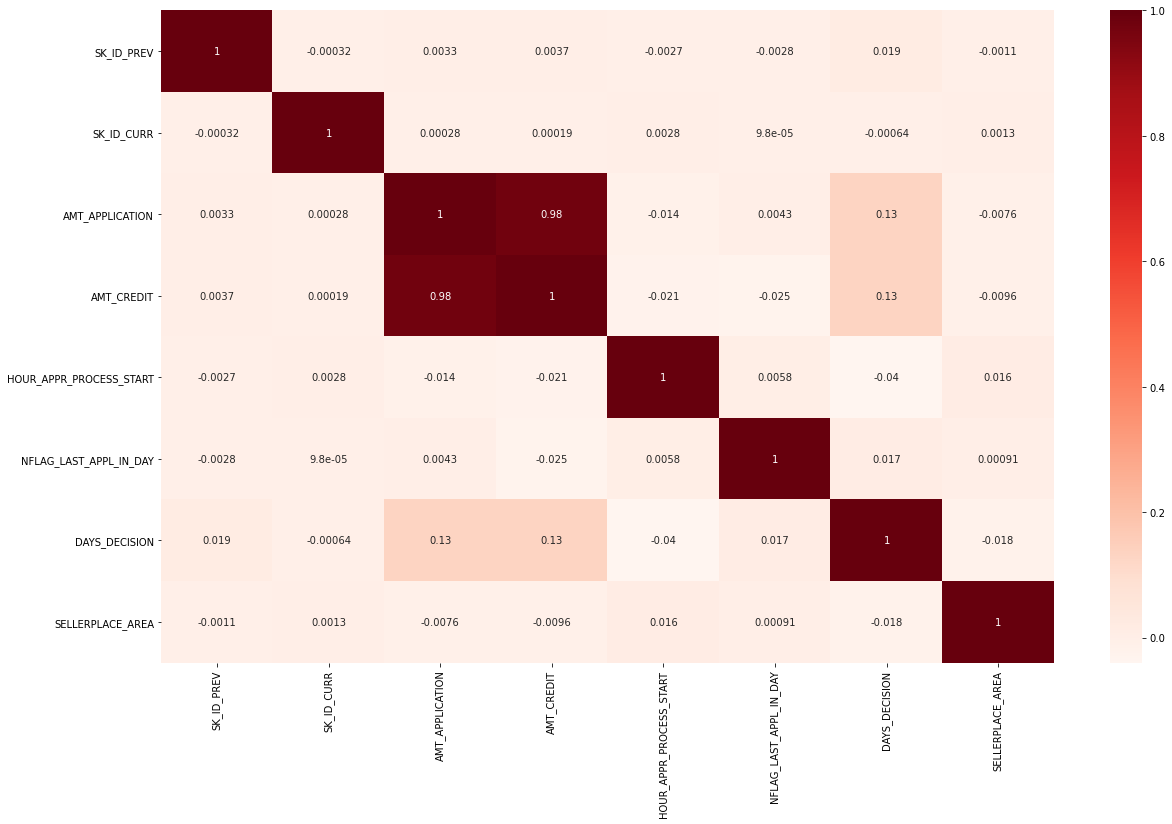

In [209]:
Correlation = previous_data.corr()
#Correlation.sort_values(by=["TARGET"],ascendingb=False,inplace=True)
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True,cmap='Reds')

Above plot shows the Correlation of variables in Previous Application

In [210]:
prev_current_app_df = pd.merge(previous_data,application_data,how="inner",on="SK_ID_CURR")
prev_current_app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 58 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_PREV                    1413701 non-null  int64  
 1   SK_ID_CURR                    1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   AMT_APPLICATION               1413701 non-null  float64
 4   AMT_CREDIT_x                  1413700 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START_x  1413701 non-null  object 
 6   HOUR_APPR_PROCESS_START       1413701 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT   1413701 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY        1413701 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE        1413701 non-null  object 
 10  NAME_CONTRACT_STATUS          1413701 non-null  object 
 11  DAYS_DECISION                 1413701 non-null  int64  
 12  NAME_PAYMENT_TYPE           

In [211]:
#find the percentage of null values in each column, to determine what needs to be done as part of clean
(prev_current_app_df.isnull().sum() * 100 / len(prev_current_app_df)).round(2)

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE_x            0.0
AMT_APPLICATION                 0.0
AMT_CREDIT_x                    0.0
WEEKDAY_APPR_PROCESS_START_x    0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
TARGET                          0.0
NAME_CONTRACT_TYPE_y            0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY             

**Correlation between previous_data and application_data dataframes**

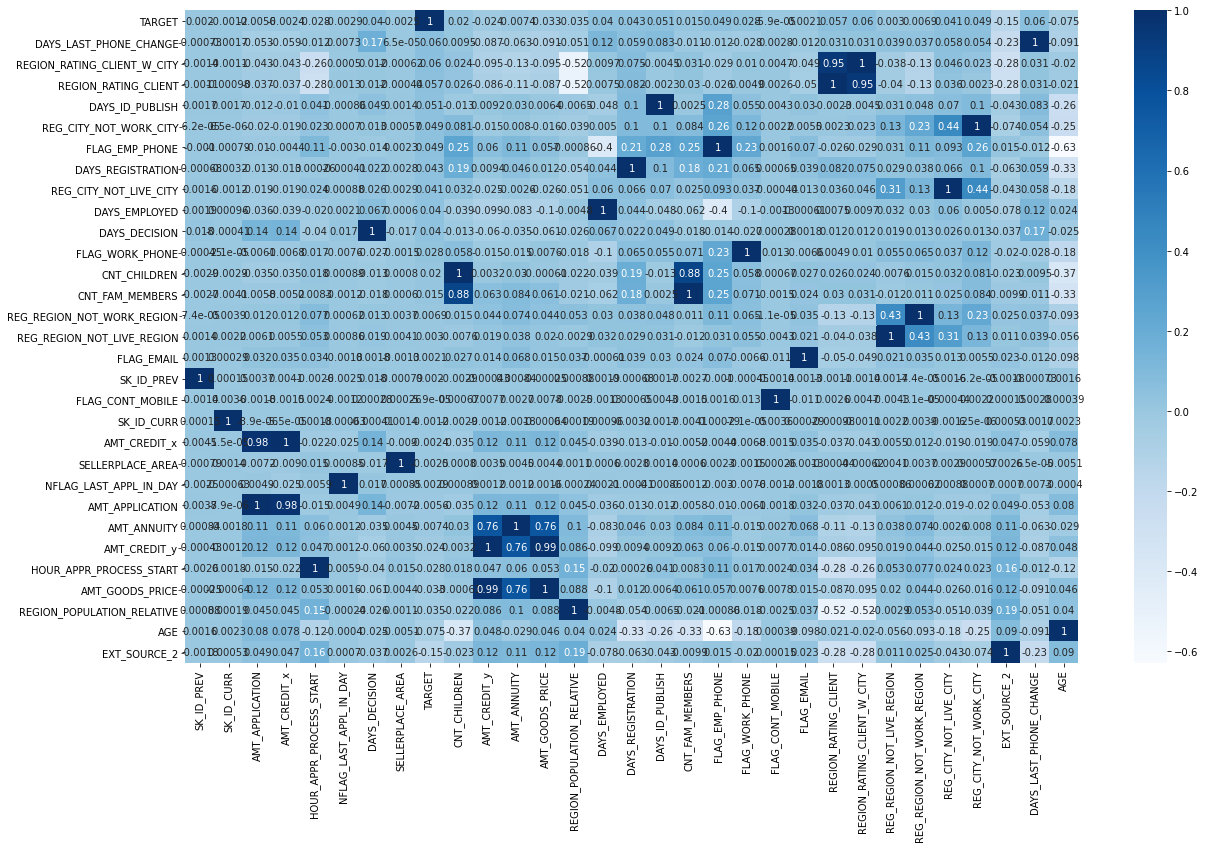

In [213]:
Correlation = prev_current_app_df.corr()
Correlation.sort_values(by=["TARGET"],ascending=False,inplace=True)
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True,cmap='Blues')

Above plot is the Correlation between **previous_data and application_data** dataframes

In [214]:
Correlation.head(6)["TARGET"][1:]

DAYS_LAST_PHONE_CHANGE         0.059721
REGION_RATING_CLIENT_W_CITY    0.059700
REGION_RATING_CLIENT           0.056932
DAYS_ID_PUBLISH                0.051037
REG_CITY_NOT_WORK_CITY         0.049353
Name: TARGET, dtype: float64

In [215]:
Correlation.tail(6)["TARGET"][1:]

HOUR_APPR_PROCESS_START      -0.027809
AMT_GOODS_PRICE              -0.032550
REGION_POPULATION_RELATIVE   -0.035028
AGE                          -0.074927
EXT_SOURCE_2                 -0.154919
Name: TARGET, dtype: float64

## Even here also  the same variables, as we seen in our Application data, has been contributing more to the DEFAULTERS Identification